**Centro Federal de Educação Tecnológica Celso Suckow da Fonseca (CEFET-RJ)**

**Programa de Pós Graduação em Ciência da Computação (PPCIC)**

**Disciplina: Mineração de Dados**

**Professor: Eduardo Ogasawara**

**Alunos: Cristiane Gea, Davi Bortolotti e Tacito Braga**

# Apresentação dos dados utilizados na análise

Os dados utilizados nesta análise foram obtidos a partir da série do preço de fechamento do Índice Bovespa, extraída do *site*. https://br.investing.com/

**Período de análise**: Janeiro/2000 - Outubro/2020

**Variáveis Utilizadas**:

* **close**: preço de fechamento da ação

* **avg10**: média móvel de 10 dias (indicador de tendência do comportamento do preço da ação no período de 10 dias).

* **avg20**: média móvel de 20 dias (indicador de tendência do comportamento do preço da ação no período de 20 dias).

* **std10**: desvio padrão de 10 dias (indicador de volatilidade do comportamento do preço da ação no período de 10 dias).

* **std20**: desvio padrão de 20 dias (indicador de volatilidade do comportamento do preço da ação no período de 20 dias).

* **rsi14**: índice de força relativa de 14 dias (indicador de momento => sinaliza a velocidade com que os preços se alteram no período de 14 dias). Mostra o enfraquecimento e até reversão de uma tendência durante 14 dias. Funciona com uma linha entre 0 e 100. Quanto mais próximo de 100, mais força está perdendo a força compradora.

* **rsi5**: índice de força relativa de 5 dias (indicador de momento => sinaliza a velocidade com que os preços se alteram no período de 5 dias).

* **macd1226**: média móvel convergente divergente (indicador de tendências significativas a curto prazo). Corresponde à diferença entre média móvel de 12 dias (média de movimentações mais rápidas) e média móvel de 26 dias (média de movimentações mais lentas). Mostra o ganho entre a divergência entre as médias móveis.

* **signal9**: média movel exponencial do macd1226 no período de 9 dias (ajuda a identificar reversões de tendência e marcar os pontos ideais de entrada e saída).

* **histogram9**: diferença entre a linha de macd1226 e a linha de signal9 (representação gráfica da convergência e da divergência das linhas macd1226 e signal9).

* **macd0720**: média móvel convergente divergente (indicador de tendências significativas a curto prazo). Corresponde à diferença entre média móvel de 7 dias (média de movimentações mais rápidas) e média móvel de 20 dias (média de movimentações mais lentas). Mostra o ganho entre a divergência entre as médias móveis.

* **signal5**: média movel exponencial do macd0720 no período de 5 dias (ajuda a identificar reversões de tendência e marcar os pontos ideais de entrada e saída).

* **histogram5**: diferença entre a linha de macd0720 e a linha de signal5 (representação gráfica da convergência e da divergência das linhas macd0720 e signal5).

* **bbands**: Bandas de Bollinger (indicador de volatilidade). As bandas são derivadas das médias móveis e mostram que, independente de qualquer movimento que o preço faça, ele tende a voltar a um equilíbrio. 

Uma linha MACD de valor positivo indica que a MME menor está acima da MME maior. Quanto mais distante a MME menor estiver da maior, maior será o aumento no valor positivo da linha MACD. Isso é um sinal de um momentum de alta crescente. Por outro lado, um MACD negativo indica que a MME menor está abaixo da maior. Mais uma vez, os valores negativos aumentam à medida em que as duas linhas divergem ainda mais. Nesse caso, temos um momentum de baixa crescente.

# Etapa 1: Overview

## 1. Importação dos dados

In [1]:
# Biblioteca(s) Necessária
library(readxl)

In [2]:
# Dados do Índice Bovespa
bvsp <- read_excel("bvsp.xlsx",
                   col_types = c("date", "numeric", "numeric", "numeric", "numeric", "numeric",
                                 "numeric", "numeric", "numeric", "numeric", "numeric", "numeric",
                                 "numeric", "numeric", "numeric"))
print(bvsp)

# A tibble: 4,983 x 15
   data                 close  avg10 avg20 std10 std20 rsi14  rsi5 macd1226
   <dttm>               <dbl>  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>    <dbl>
 1 2000-12-27 00:00:00 15186.    NA     NA   NA     NA    NA  NA         NA
 2 2000-12-28 00:00:00 15259.    NA     NA   NA     NA    NA  NA         NA
 3 2001-01-02 00:00:00 15425.    NA     NA   NA     NA    NA  NA         NA
 4 2001-01-03 00:00:00 16599.    NA     NA   NA     NA    NA  NA         NA
 5 2001-01-04 00:00:00 16675.    NA     NA   NA     NA    NA  NA         NA
 6 2001-01-05 00:00:00 16410.    NA     NA   NA     NA    NA  84.9       NA
 7 2001-01-08 00:00:00 16562.    NA     NA   NA     NA    NA  85.5       NA
 8 2001-01-09 00:00:00 16976.    NA     NA   NA     NA    NA  87.3       NA
 9 2001-01-10 00:00:00 16919.    NA     NA   NA     NA    NA  66.6       NA
10 2001-01-11 00:00:00 17024. 16304.    NA  727.    NA    NA  67.5       NA
# ... with 4,973 more rows, and 6 more variables: signal9 <dbl>,


In [3]:
# Fixação do conjunto de dados
attach(bvsp)

## 2. Análise inicial do dataframe

**Análise do tipo dos dados do dataframe "bvsp"**

In [4]:
str(bvsp)

tibble [4,983 x 15] (S3: tbl_df/tbl/data.frame)
 $ data      : POSIXct[1:4983], format: "2000-12-27" "2000-12-28" ...
 $ close     : num [1:4983] 15186 15259 15425 16599 16675 ...
 $ avg10     : num [1:4983] NA NA NA NA NA ...
 $ avg20     : num [1:4983] NA NA NA NA NA NA NA NA NA NA ...
 $ std10     : num [1:4983] NA NA NA NA NA ...
 $ std20     : num [1:4983] NA NA NA NA NA NA NA NA NA NA ...
 $ rsi14     : num [1:4983] NA NA NA NA NA NA NA NA NA NA ...
 $ rsi5      : num [1:4983] NA NA NA NA NA ...
 $ macd1226  : num [1:4983] NA NA NA NA NA NA NA NA NA NA ...
 $ signal9   : num [1:4983] NA NA NA NA NA NA NA NA NA NA ...
 $ histogram9: num [1:4983] NA NA NA NA NA NA NA NA NA NA ...
 $ macd0720  : num [1:4983] NA NA NA NA NA NA NA NA NA NA ...
 $ signal5   : num [1:4983] NA NA NA NA NA NA NA NA NA NA ...
 $ histogram5: num [1:4983] NA NA NA NA NA NA NA NA NA NA ...
 $ bbands    : num [1:4983] NA NA NA NA NA NA NA NA NA NA ...


Em todos os casos, o atributo "data" é do tipo data e os demais atributos são do tipo numérico.

**Análise da dimensão dos dataframes**

In [5]:
dim(bvsp)

# 4983 linhas e 15 colunas

[1] 4983   15

**Primeiras linhas dos dataframes**

In [6]:
head(bvsp)

# início dos dados: 27/12/2000

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-12-27,15186.15,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2000-12-28,15259.29,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2001-01-02,15425.34,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2001-01-03,16599.42,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2001-01-04,16675.06,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2001-01-05,16409.81,NA,NA,NA,NA,NA,84.8788,NA,NA,NA,NA,NA,NA,NA


**Últimas linhas dos dataframes**

In [7]:
tail(bvsp)

# término dos dados: 30/12/2020

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-12-21,115822.6,115791.5,113522.0,1832.993,2873.893,67.66467,59.51283,3218.693,3236.405,-17.71281,3000.938,3266.029,-265.09192,11495.57
2020-12-22,116636.2,116075.8,113864.5,1704.578,2812.780,68.50740,54.31953,3088.065,3234.257,-146.19147,2753.718,3199.076,-445.35854,11251.12
2020-12-23,117806.9,116556.4,114248.2,1389.806,2800.311,70.26033,49.50544,3043.917,3219.454,-175.53719,2701.572,3075.912,-374.34033,11201.25
2020-12-28,119123.7,116955.9,114693.0,1503.361,2834.349,69.94729,56.14997,3079.687,3206.584,-126.89670,2805.662,2941.483,-135.82091,11337.39
2020-12-29,119409.1,117384.0,115134.7,1534.259,2847.189,71.40391,61.96922,3095.387,3202.486,-107.09865,2853.670,2823.112,30.55826,11388.75
2020-12-30,119017.2,117824.6,115640.9,1257.111,2565.128,68.95178,90.14928,3041.149,3188.206,-147.05645,2757.650,2774.454,-16.80455,10260.51


**Identificação de *missing values***

In [8]:
table(is.na(bvsp))

# 268 missing values


FALSE  TRUE 
74477   268 

## 3. Conhecendo melhor as variáveis de interesse

In [9]:
# Biblioteca(s) Necessária(s)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




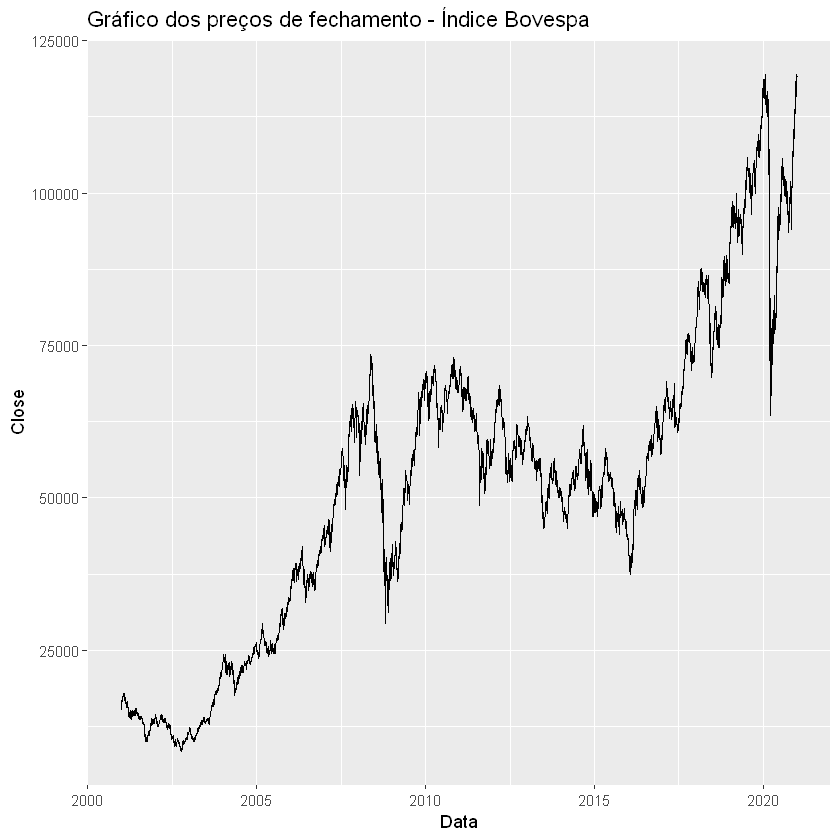

In [10]:
Data <- bvsp$data
Close <- bvsp$close

bvsp %>%
    ggplot() + 
    geom_line(aes(x = Data, y = Close)) +
    ggtitle("Gráfico dos preços de fechamento - Índice Bovespa")

# Etapa 2: Construção da série de direção do atributo "close"

In [11]:
# Biblioteca(s) Necessária(s)
library(quantmod)

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'xts'


The following objects are masked from 'package:dplyr':

    first, last


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



**Direção da Variável Preço:**

* 1 = up (aumento do preço da ação)

* 0 = down (redução do preço da ação)

In [12]:
direction <- NULL

# Direção = Up quando preço atual > preço anterior de 20 dias
direction[bvsp$close > lag(bvsp$close, 20)] <- 1

# Direção = Up quando preço atual < preço anterior de 20 dias
direction[bvsp$close < lag(bvsp$close, 20)] <- 0

bvsp$direction <- direction

In [13]:
colnames(bvsp)

[1] "data"       "close"      "avg10"      "avg20"      "std10"     
 [6] "std20"      "rsi14"      "rsi5"       "macd1226"   "signal9"   
[11] "histogram9" "macd0720"   "signal5"    "histogram5" "bbands"    
[16] "direction"

**Direção do Retorno da Ação**:

* "up" = aumento do retorno

* "down" = redução do retorno

* "nowhere" = nenhum dos casos anteriores

In [14]:
# Cálculo do retorno da ação em relação ao preço da ação de 20 dias atrás
lagret <- (bvsp$close - lag(bvsp$close, 20)) / lag(bvsp$close, 20)

dirret <- NULL

# Direção = down quando retorno da ação é inferior a -0.02
dirret[lagret < -0.02] <- "down"

# Direção = up quando retorno da ação é superior a 0.02
dirret[lagret > 0.02] <- "up"

# Direção = nowhere quando retorno da ação está entre -0.02 e 0.02
dirret[lagret < 0.02 & lagret > -0.02] <- "nowhere"

bvsp$dirret <- dirret

In [15]:
colnames(bvsp)

[1] "data"       "close"      "avg10"      "avg20"      "std10"     
 [6] "std20"      "rsi14"      "rsi5"       "macd1226"   "signal9"   
[11] "histogram9" "macd0720"   "signal5"    "histogram5" "bbands"    
[16] "direction"  "dirret"

# Etapa 3: Identificação e tratamento de *missing values*

## 1. Contabilização de *missing values*

In [16]:
round(prop.table(table(is.na(bvsp)))*100, digits = 2)

# 0.36% do dataframe corresponde a missing values


FALSE  TRUE 
99.64  0.36 

## 2. Remoção dos *missing values*

In [17]:
bvspn <- na.omit(bvsp)

round(prop.table(table(is.na(bvspn)))*100, digits = 2)

# O dataframe não possui missing values


FALSE 
  100 

In [18]:
head(bvspn)

# o novo dataframe tem início em 15/02/2001

data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2001-02-15,16937.19,16991.71,17308.54,158.7431,388.3144,32.82337,28.506228,8236.488,11205.687,-2969.198,3740.946,4636.159,-895.2139,1553.258,0,nowhere
2001-02-16,16259.05,16926.12,17245.42,281.7944,449.6417,26.41297,15.792831,7588.201,10419.429,-2831.227,3263.153,4163.006,-899.8522,1798.567,0,down
2001-02-19,16060.76,16859.07,17171.95,391.6612,515.8437,26.12849,16.081218,6977.991,9676.290,-2698.299,2830.555,3716.313,-885.7578,2063.375,0,down
2001-02-20,15910.57,16749.45,17097.89,487.4264,584.3988,25.39610,1.967173,6408.404,8975.794,-2567.391,2446.369,3288.032,-841.6628,2337.595,0,down
2001-02-21,15593.86,16627.60,16985.98,607.4741,647.3201,27.86520,0.000000,5863.851,8310.065,-2446.214,2078.409,2871.887,-793.4771,2589.280,0,down
2001-02-22,15910.36,16494.31,16892.91,603.5913,662.0429,35.46813,19.068218,5395.631,7682.896,-2287.265,1828.219,2489.341,-661.1224,2648.171,0,down


# Etapa 4: Análise Exploratória de Dados

## 1. Estatística Descritiva

In [19]:
summary(bvspn[,-c(1, 16, 17)])

     close            avg10            avg20            std10         
 Min.   :  8371   Min.   :  8740   Min.   :  8883   Min.   :   85.14  
 1st Qu.: 34817   1st Qu.: 34861   1st Qu.: 35104   1st Qu.:  520.78  
 Median : 53798   Median : 53714   Median : 53662   Median :  835.00  
 Mean   : 51946   Mean   : 51854   Mean   : 51754   Mean   :  976.29  
 3rd Qu.: 65550   3rd Qu.: 65535   3rd Qu.: 65562   3rd Qu.: 1234.99  
 Max.   :119528   Max.   :117874   Max.   :117282   Max.   :12936.44  
     std20             rsi14             rsi5           macd1226       
 Min.   :  119.8   Min.   : 7.646   Min.   :  0.00   Min.   :-12092.4  
 1st Qu.:  742.3   1st Qu.:40.804   1st Qu.: 32.20   1st Qu.:  -330.8  
 Median : 1165.3   Median :53.198   Median : 54.35   Median :   161.2  
 Mean   : 1349.9   Mean   :53.121   Mean   : 53.29   Mean   :   156.8  
 3rd Qu.: 1689.5   3rd Qu.:65.671   3rd Qu.: 74.65   3rd Qu.:   738.2  
 Max.   :16854.7   Max.   :97.156   Max.   :100.00   Max.   :  8236.5  

A função "summary" não fornece todas as estatísticas descritivas (ex.: desvio padrão, assimetria, curtose...).

Para uma análise mais completa criaremos uma tabela com mais medidas de estatística descritiva.

In [20]:
# Biblioteca(s) Necessária(s)
library(moments)

In [21]:
# Remoção das colunas "data", "direction" e "dirret"
mbvsp <- as.matrix(bvspn[,-c(1, 16, 17)])    

In [22]:
# Cálculo das medidas de estatística descritiva
n <- ncol(mbvsp)

# Média
mean_bvsp <- numeric(n)
names(mean_bvsp) <- colnames(mbvsp)
for (i in 1:n) {
    mean_bvsp[i] <- mean(mbvsp[,i])
}
mean_bvsp <- round(mean_bvsp, digits = 2)

# Desvio Padrão
sd_bvsp <- numeric(n)
names(sd_bvsp) <- colnames(mbvsp)
for (i in 1:n) {
    sd_bvsp[i] <- sd(mbvsp[,i])
}
sd_bvsp <- round(sd_bvsp, digits = 2)

# Mínimo
min_bvsp <- numeric(n)
names(min_bvsp) <- colnames(mbvsp)
for (i in 1:n) {
    min_bvsp[i] <- min(mbvsp[,i])
}
min_bvsp <- round(min_bvsp, digits = 2)

# 1º Qurtil
q1_bvsp <- numeric(n)
names(q1_bvsp) <- colnames(mbvsp)
for (i in 1:n) {
    q1_bvsp[i] <- quantile(mbvsp[,i], probs = 0.25)
}
q1_bvsp <- round(q1_bvsp, digits = 2)

# Mediana
median_bvsp <- numeric(n)
names(median_bvsp) <- colnames(mbvsp)
for (i in 1:n) {
    median_bvsp[i] <- median(mbvsp[,i])
}
median_bvsp <- round(median_bvsp, digits = 2)

# 3º Qurtil
q3_bvsp <- numeric(n)
names(q3_bvsp) <- colnames(mbvsp)
for (i in 1:n) {
    q3_bvsp[i] <- quantile(mbvsp[,i], probs = 0.75)
}
q3_bvsp <- round(q3_bvsp, digits = 2)

# Máximo
max_bvsp <- numeric(n)
names(max_bvsp) <- colnames(mbvsp)
for (i in 1:n) {
    max_bvsp[i] <- max(mbvsp[,i])
}
max_bvsp <- round(max_bvsp, digits = 2)

# Coeficiente de Variação
cv_bvsp <- numeric(n)
names(cv_bvsp) <- colnames(mbvsp)
for (i in 1:n) {
    cv_bvsp[i] <- sd(mbvsp[,i])/mean(mbvsp[,i])
}
cv_bvsp <- round(cv_bvsp, digits = 2)

# Assimetria
skew_bvsp <- numeric(n)
names(skew_bvsp) <- colnames(mbvsp)
for (i in 1:n) {
    skew_bvsp[i] <- skewness(mbvsp[,i])
}
skew_bvsp <- round(skew_bvsp, digits = 2)

# Curtose
kurt_bvsp <- numeric(n)
names(kurt_bvsp) <- colnames(mbvsp)
for (i in 1:n) {
    kurt_bvsp[i] <- kurtosis(mbvsp[,i])
}
kurt_bvsp <- round(kurt_bvsp, digits = 2)

In [23]:
# Montagem da matriz com as medidas de estatística descritiva
stat_data1 <- c(mean_bvsp, sd_bvsp, min_bvsp, q1_bvsp, median_bvsp, q3_bvsp, max_bvsp, cv_bvsp, skew_bvsp, kurt_bvsp)
stat_bvsp <- matrix(stat_data1, nrow = 14, ncol = 10)
colnames(stat_bvsp) <- c("media", "sd", "min", "q1", "median", "q3", "max", "cv", "skew", "kurt")
rownames(stat_bvsp) <- c("close", "avg10", "avg20", "std10", "std20", "rsi14", "rsi5", "macd1226", "signal9", "histogram9",
                         "macd7205", "signal5", "histogram5", "bbands")
stat_bvsp

,media,sd,min,q1,median,q3,max,cv,skew,kurt
close,51945.53,25374.59,8370.88,34817.16,53797.71,65549.88,119527.63,0.49,0.23,2.70
avg10,51853.50,25289.60,8739.86,34861.46,53713.92,65535.45,117873.76,0.49,0.22,2.68
avg20,51753.85,25201.18,8882.87,35103.55,53662.15,65562.40,117281.86,0.49,0.20,2.66
std10,976.29,778.42,85.14,520.78,835.00,1234.99,12936.44,0.80,5.37,62.17
std20,1349.91,1111.61,119.83,742.26,1165.31,1689.55,16854.65,0.82,6.29,72.52
rsi14,53.12,16.48,7.65,40.80,53.20,65.67,97.16,0.31,-0.01,2.37
rsi5,53.29,26.96,0.00,32.20,54.35,74.65,100.00,0.51,-0.10,2.07
macd1226,156.80,1159.17,-12092.44,-330.76,161.17,738.21,8236.49,7.39,-2.19,25.17
signal9,162.86,1165.27,-10920.76,-334.01,160.99,718.99,11205.69,7.16,-1.43,26.01
histogram9,-6.06,384.31,-3781.92,-170.19,5.67,171.25,2567.43,-63.38,-1.13,18.51


## 2. Identificação e tratamento de *outliers*

### 2.1. Identificação de *outliers*

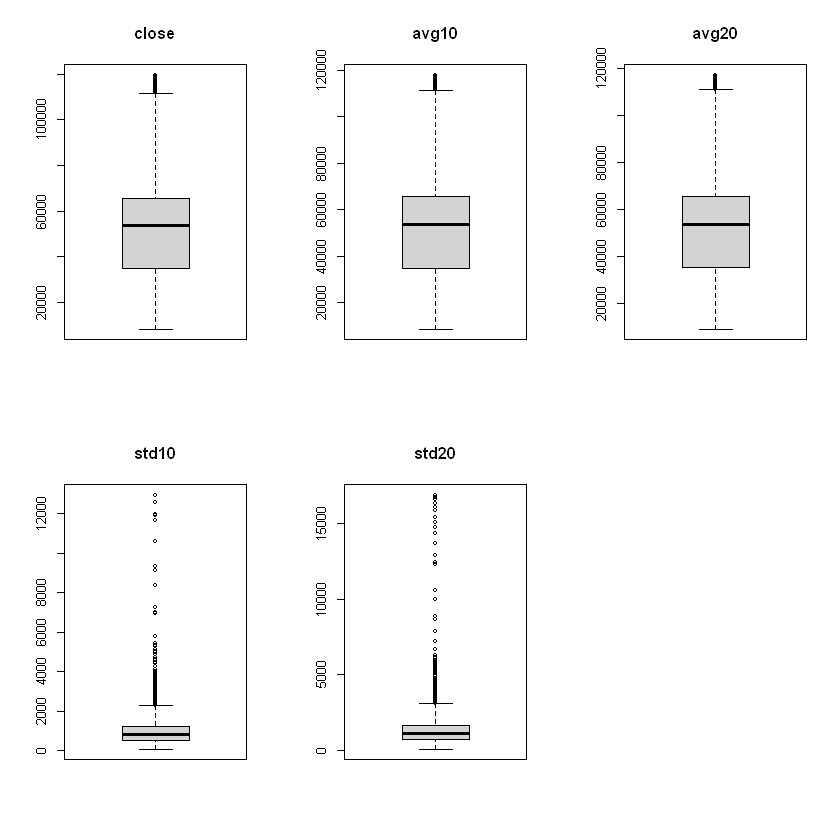

In [24]:
par(mfrow=c(2,3))

boxplot(bvspn$close, col="light gray",  main="close", border="black", horizontal=FALSE)

boxplot(bvspn$avg10, col="light gray", main="avg10", border="black", horizontal=FALSE)

boxplot(bvspn$avg20, col="light gray", main="avg20", border="black", horizontal=FALSE)

boxplot(bvspn$std10, col="light gray", main="std10", border="black", horizontal=FALSE)

boxplot(bvspn$std20, col="light gray", main="std20", border="black", horizontal=FALSE)

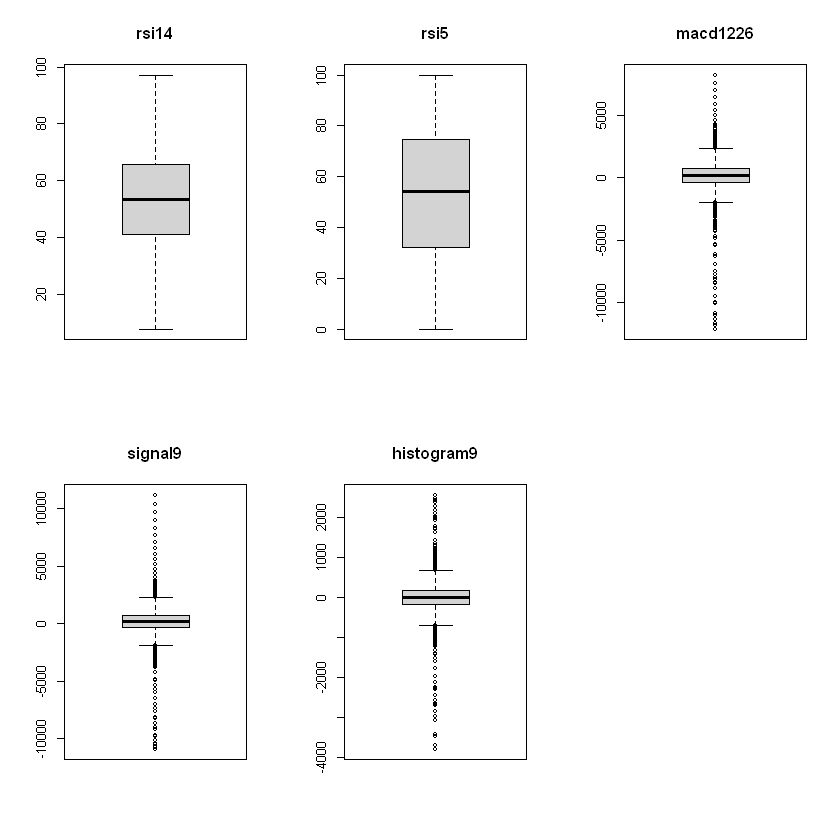

In [25]:
par(mfrow=c(2,3))

boxplot(bvspn$rsi14, col="light gray", main="rsi14", border="black", horizontal=FALSE)

boxplot(bvspn$rsi5, col="light gray", main="rsi5", border="black", horizontal=FALSE)

boxplot(bvspn$macd1226, col="light gray", main="macd1226", border="black", horizontal=FALSE)

boxplot(bvspn$signal9, col="light gray",  main="signal9", border="black", horizontal=FALSE)

boxplot(bvspn$histogram9, col="light gray", main="histogram9", border="black", horizontal=FALSE)

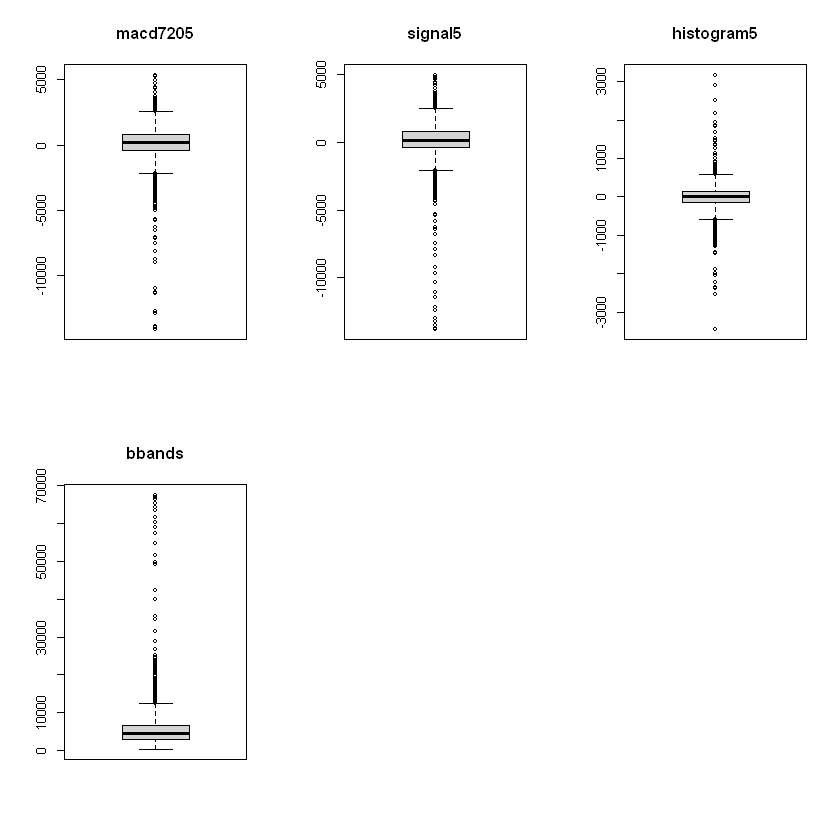

In [26]:
par(mfrow=c(2,3))

boxplot(bvspn$macd0720, col="light gray", main="macd7205", border="black", horizontal=FALSE)

boxplot(bvspn$signal5, col="light gray", main="signal5", border="black", horizontal=FALSE)

boxplot(bvspn$histogram5, col="light gray", main="histogram5", border="black", horizontal=FALSE)

boxplot(bvspn$bbands, col="light gray", main="bbands", border="black", horizontal=FALSE)

### 2.2. Tratamento de *outliers*

In [27]:
# Biblioteca(s) Necessária(s)
library(outliers)

In [28]:
# Substituição dos outliers pelas medianas dos dados
bvspout <- rm.outlier(bvspn[,-c(1, 16, 17)], fill = TRUE, median = TRUE, opposite = FALSE)

In [29]:
head(bvspout)

,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16937.19,16991.71,17308.54,158.7431,388.3144,32.82337,28.506228,8236.488,11205.687,-2969.198,3740.946,4636.159,-895.2139,1553.258
2,16259.05,16926.12,17245.42,281.7944,449.6417,26.41297,15.792831,7588.201,10419.429,-2831.227,3263.153,4163.006,-899.8522,1798.567
3,16060.76,16859.07,17171.95,391.6612,515.8437,26.12849,16.081218,6977.991,9676.290,-2698.299,2830.555,3716.313,-885.7578,2063.375
4,15910.57,16749.45,17097.89,487.4264,584.3988,25.39610,1.967173,6408.404,8975.794,-2567.391,2446.369,3288.032,-841.6628,2337.595
5,15593.86,16627.60,16985.98,607.4741,647.3201,27.86520,55.198115,5863.851,8310.065,-2446.214,2078.409,2871.887,-793.4771,2589.280
6,15910.36,16494.31,16892.91,603.5913,662.0429,35.46813,19.068218,5395.631,7682.896,-2287.265,1828.219,2489.341,-661.1224,2648.171


In [30]:
bvspout <- cbind(bvspn[,1], bvspout, bvspn[,16:17])

In [31]:
head(bvspout)

,data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2001-02-15,16937.19,16991.71,17308.54,158.7431,388.3144,32.82337,28.506228,8236.488,11205.687,-2969.198,3740.946,4636.159,-895.2139,1553.258,0,nowhere
2,2001-02-16,16259.05,16926.12,17245.42,281.7944,449.6417,26.41297,15.792831,7588.201,10419.429,-2831.227,3263.153,4163.006,-899.8522,1798.567,0,down
3,2001-02-19,16060.76,16859.07,17171.95,391.6612,515.8437,26.12849,16.081218,6977.991,9676.290,-2698.299,2830.555,3716.313,-885.7578,2063.375,0,down
4,2001-02-20,15910.57,16749.45,17097.89,487.4264,584.3988,25.39610,1.967173,6408.404,8975.794,-2567.391,2446.369,3288.032,-841.6628,2337.595,0,down
5,2001-02-21,15593.86,16627.60,16985.98,607.4741,647.3201,27.86520,55.198115,5863.851,8310.065,-2446.214,2078.409,2871.887,-793.4771,2589.280,0,down
6,2001-02-22,15910.36,16494.31,16892.91,603.5913,662.0429,35.46813,19.068218,5395.631,7682.896,-2287.265,1828.219,2489.341,-661.1224,2648.171,0,down


## 3. Histogramas

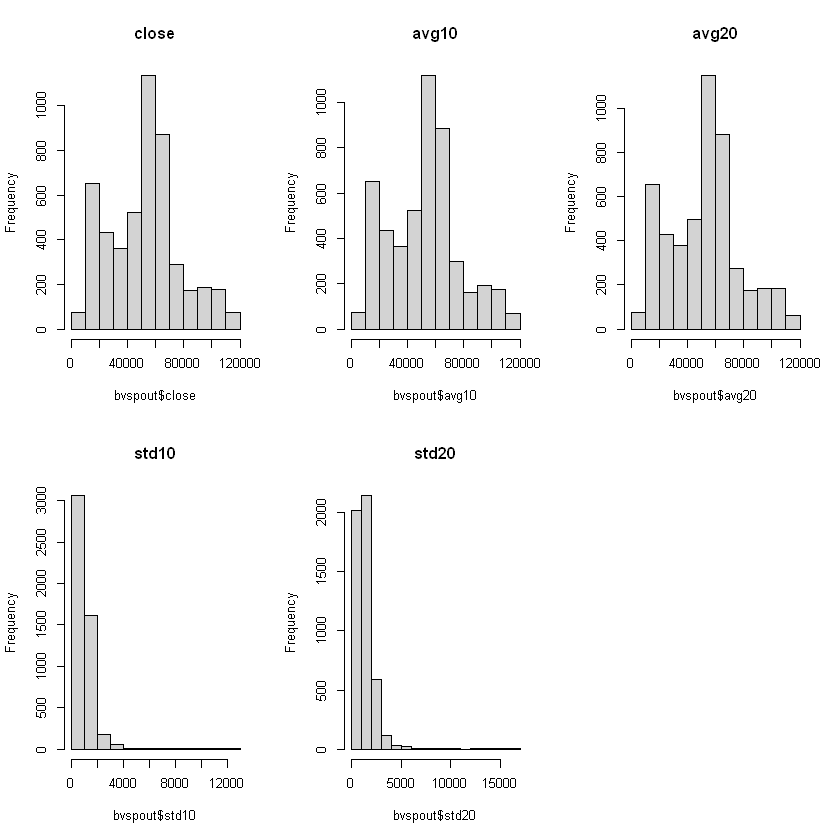

In [32]:
par(mfrow=c(2,3))

hist(bvspout$close, col="light gray",  main="close", border="black")

hist(bvspout$avg10, col="light gray", main="avg10", border="black")

hist(bvspout$avg20, col="light gray", main="avg20", border="black")

hist(bvspout$std10, col="light gray", main="std10", border="black")

hist(bvspout$std20, col="light gray", main="std20", border="black")

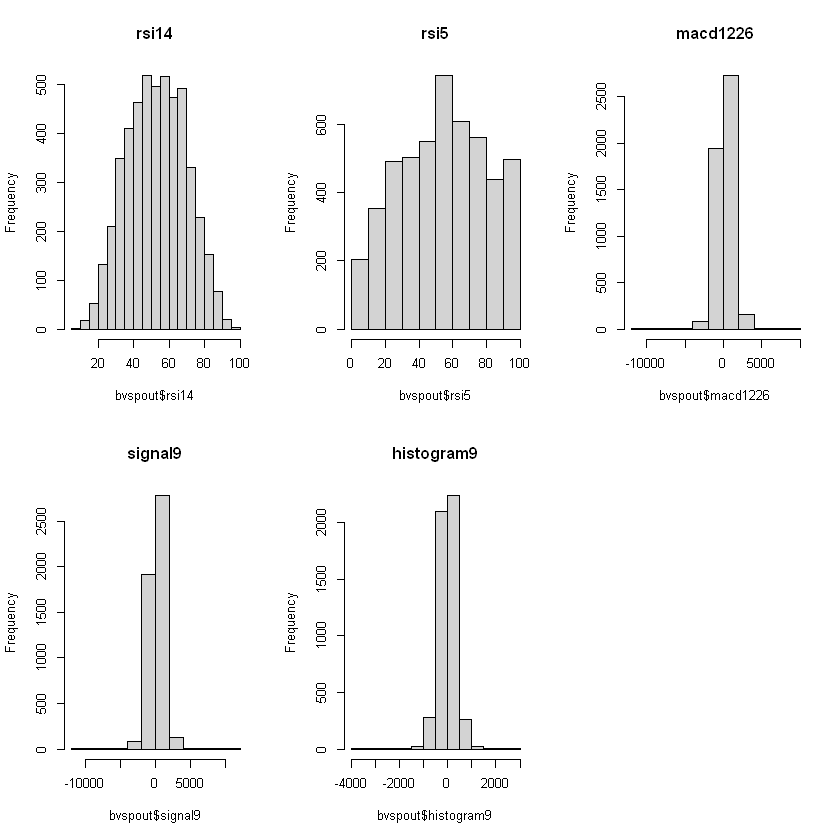

In [33]:
par(mfrow=c(2,3))

hist(bvspout$rsi14, col="light gray", main="rsi14", border="black")

hist(bvspout$rsi5, col="light gray", main="rsi5", border="black")

hist(bvspout$macd1226, col="light gray", main="macd1226", border="black")

hist(bvspout$signal9, col="light gray",  main="signal9", border="black")

hist(bvspout$histogram9, col="light gray", main="histogram9", border="black")

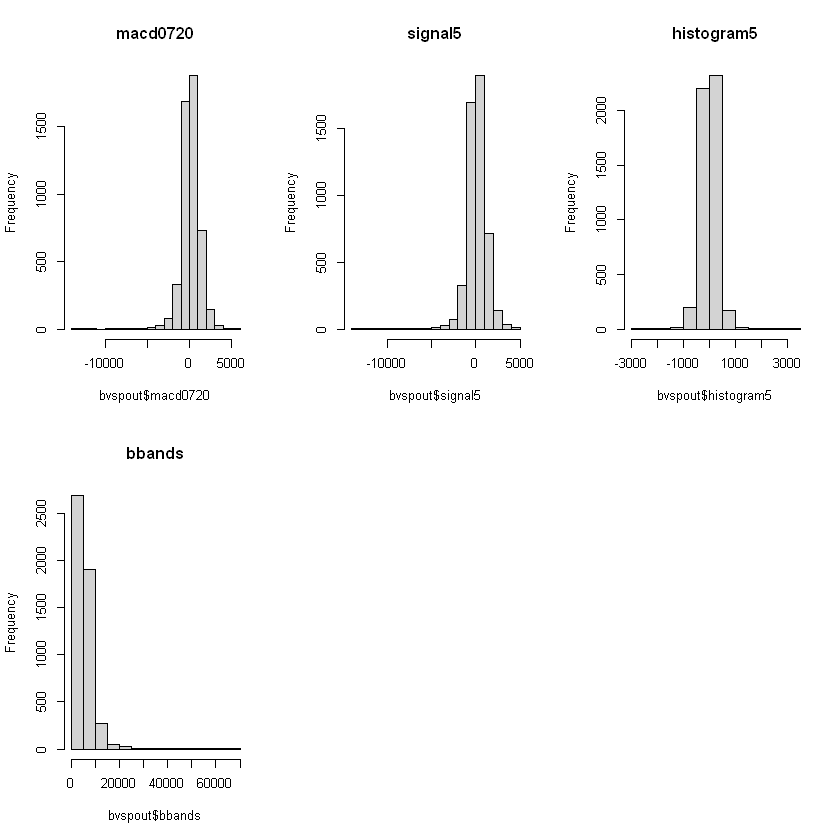

In [34]:
par(mfrow=c(2,3))

hist(bvspout$macd0720, col="light gray", main="macd0720", border="black")

hist(bvspout$signal5, col="light gray", main="signal5", border="black")

hist(bvspout$histogram5, col="light gray", main="histogram5", border="black")

hist(bvspout$bbands, col="light gray", main="bbands", border="black")

## 4. Densidades

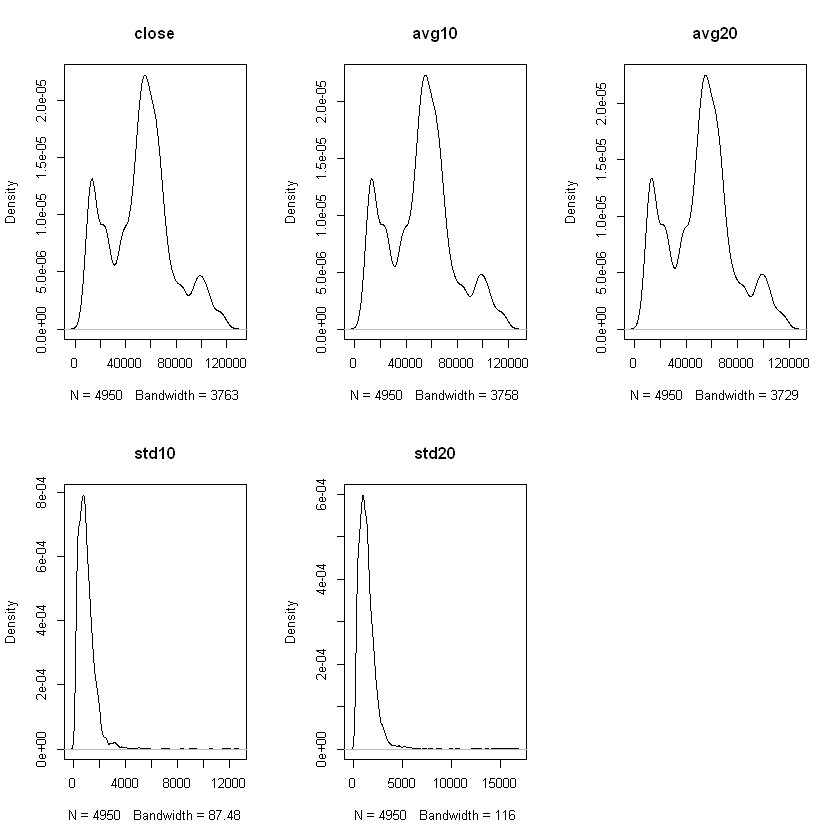

In [35]:
par(mfrow=c(2,3))

den1 <- density(bvspout$close)
plot(den1, main = "close")

den2 <- density(bvspout$avg10)
plot(den2, main = "avg10")

den3 <- density(bvspout$avg20)
plot(den3, main = "avg20")

den4 <- density(bvspout$std10)
plot(den4, main = "std10")

den5 <- density(bvspout$std20)
plot(den5, main = "std20")

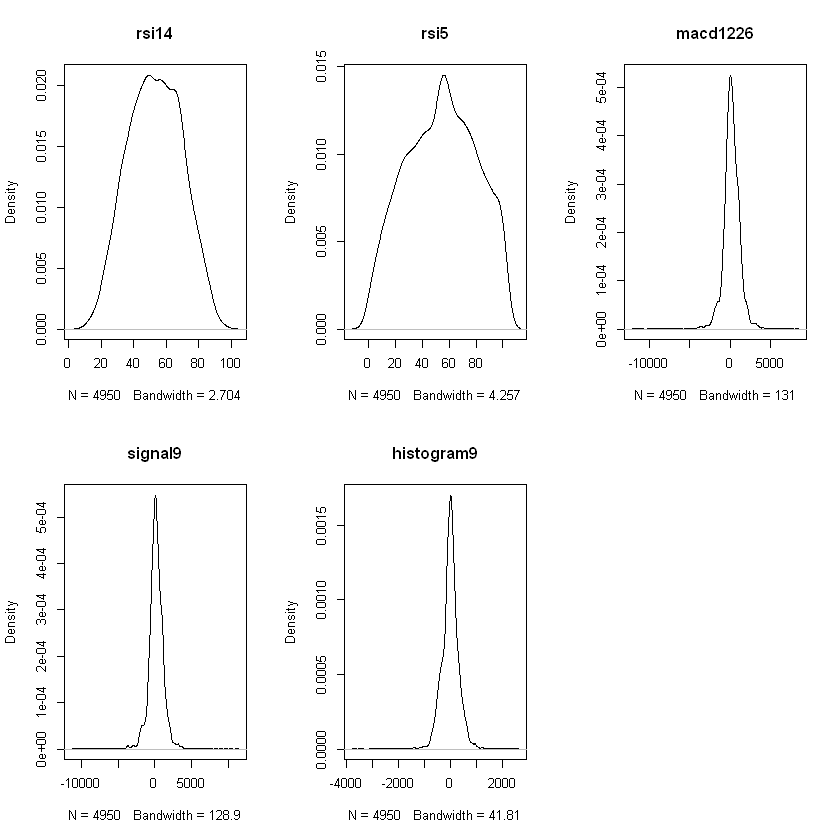

In [36]:
par(mfrow=c(2,3))

den6 <- density(bvspout$rsi14)
plot(den6, main = "rsi14")

den7 <- density(bvspout$rsi5)
plot(den7, main = "rsi5")

den8 <- density(bvspout$macd1226)
plot(den8, main = "macd1226")

den9 <- density(bvspout$signal9)
plot(den9, main = "signal9")

den10 <- density(bvspout$histogram9)
plot(den10, main = "histogram9")

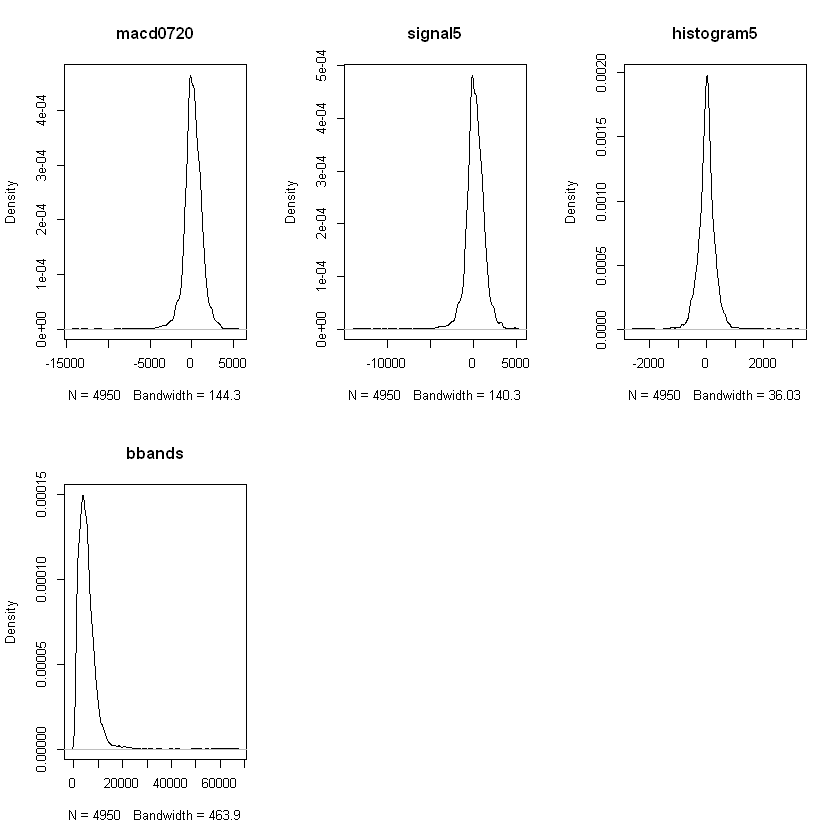

In [37]:
par(mfrow=c(2,3))

den11 <- density(bvspout$macd0720)
plot(den11, main = "macd0720")

den12 <- density(bvspout$signal5)
plot(den12, main = "signal5")

den13 <- density(bvspout$histogram5)
plot(den13, main = "histogram5")

den14 <- density(bvspout$bbands)
plot(den14, main = "bbands")

## 5. Correlação

In [38]:
# Biblioteca(s) Necessária(s)
library(corrplot)

corrplot 0.84 loaded



In [39]:
# Cálculo das correlações entre os atributos numéricos
df <- bvspout[,c(2:15)]

round(cor(df), digits = 2)

,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
close,1.00,1.00,0.99,0.47,0.46,0.09,0.05,0.15,0.14,0.04,0.15,0.15,0.01,0.46
avg10,1.00,1.00,1.00,0.48,0.47,0.06,0.01,0.12,0.12,-0.01,0.11,0.12,-0.04,0.47
avg20,0.99,1.00,1.00,0.50,0.49,0.03,0.00,0.08,0.09,-0.03,0.07,0.08,-0.04,0.49
std10,0.47,0.48,0.50,1.00,0.81,-0.09,0.00,-0.33,-0.30,-0.13,-0.34,-0.34,-0.01,0.81
std20,0.46,0.47,0.49,0.81,1.00,0.00,0.00,-0.36,-0.32,-0.02,-0.34,-0.32,0.06,1.00
rsi14,0.09,0.06,0.03,-0.09,0.00,1.00,0.58,0.55,0.37,0.54,0.68,0.61,0.32,0.00
rsi5,0.05,0.01,0.00,0.00,0.00,0.58,1.00,0.24,0.07,0.51,0.38,0.21,0.66,0.00
macd1226,0.15,0.12,0.08,-0.33,-0.36,0.55,0.24,1.00,0.93,0.12,0.94,0.95,-0.06,-0.36
signal9,0.14,0.12,0.09,-0.30,-0.32,0.37,0.07,0.93,1.00,-0.19,0.77,0.86,-0.29,-0.32
histogram9,0.04,-0.01,-0.03,-0.13,-0.02,0.54,0.51,0.12,-0.19,1.00,0.44,0.25,0.73,-0.02


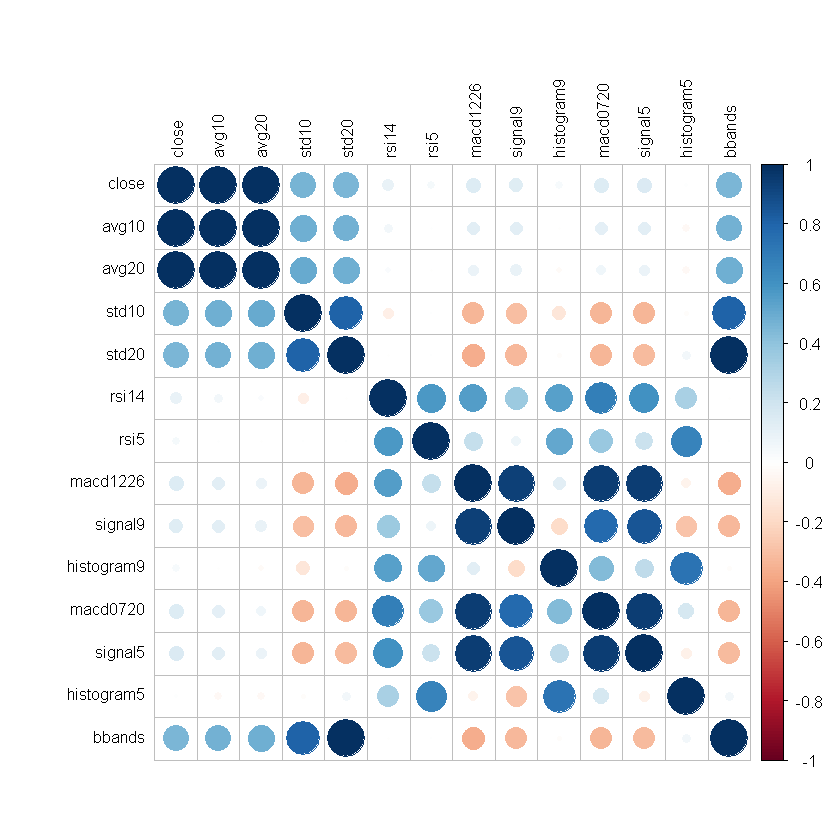

In [40]:
# Matriz de correlação
corrplot(cor(df), method = "circle", tl.col="black", tl.cex=0.8, tl.srt=90)

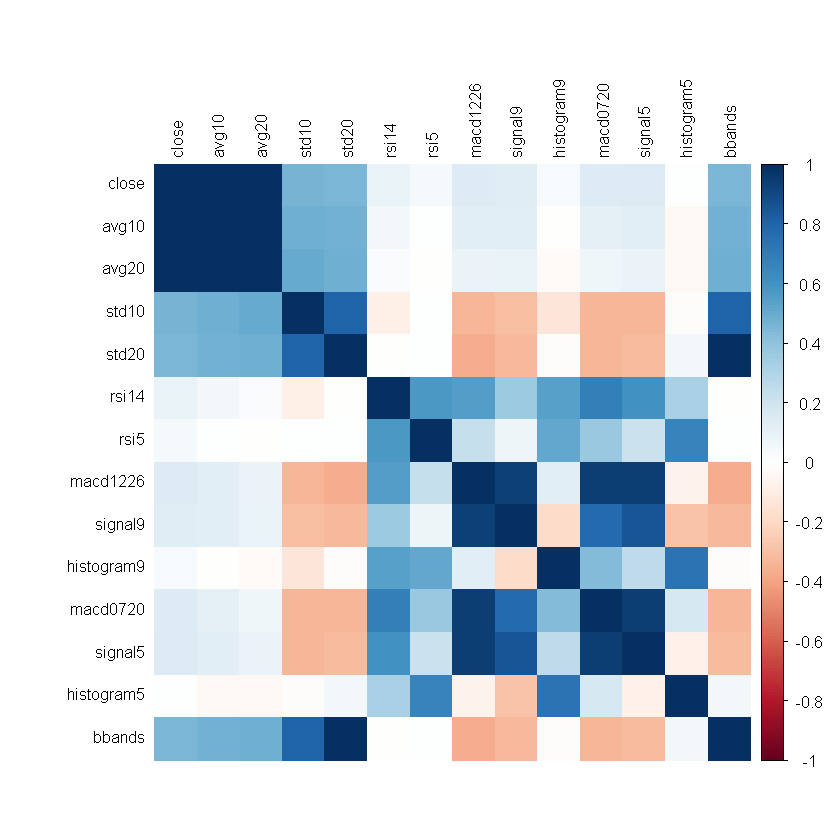

In [41]:
corrplot(cor(df), method = "color", tl.col="black", tl.cex=0.8, tl.srt=90)

## 6. QQ Plot

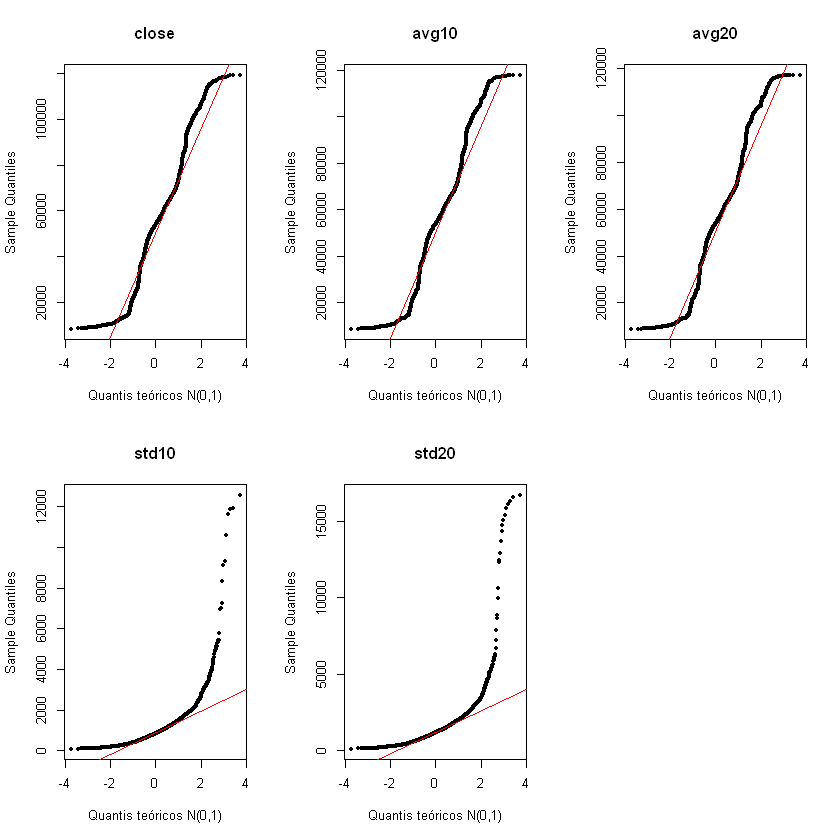

In [42]:
par(mfrow=c(2,3))

qqnorm(bvspout$close, main = "close", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$close, lty = 1, col = "red")

qqnorm(bvspout$avg10, main = "avg10", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$avg10, lty = 1, col = "red")

qqnorm(bvspout$avg20, main = "avg20", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$avg20, lty = 1, col = "red")

qqnorm(bvspout$std10, main = "std10", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$std10, lty = 1, col = "red")

qqnorm(bvspout$std20, main = "std20", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$std20, lty = 1, col = "red")

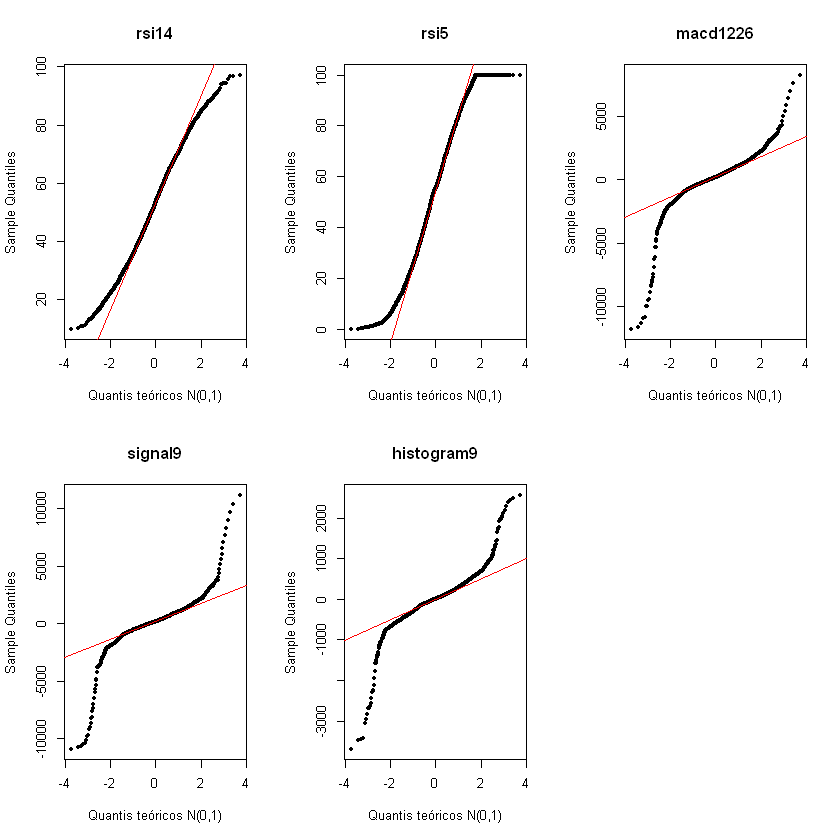

In [43]:
par(mfrow=c(2,3))

qqnorm(bvspout$rsi14, main = "rsi14", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$rsi14, lty = 1, col = "red")

qqnorm(bvspout$rsi5, main = "rsi5", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$rsi5, lty = 1, col = "red")

qqnorm(bvspout$macd1226, main = "macd1226", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$macd1226, lty = 1, col = "red")

qqnorm(bvspout$signal9, main = "signal9", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$signal9, lty = 1, col = "red")

qqnorm(bvspout$histogram9, main = "histogram9", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$histogram9, lty = 1, col = "red")

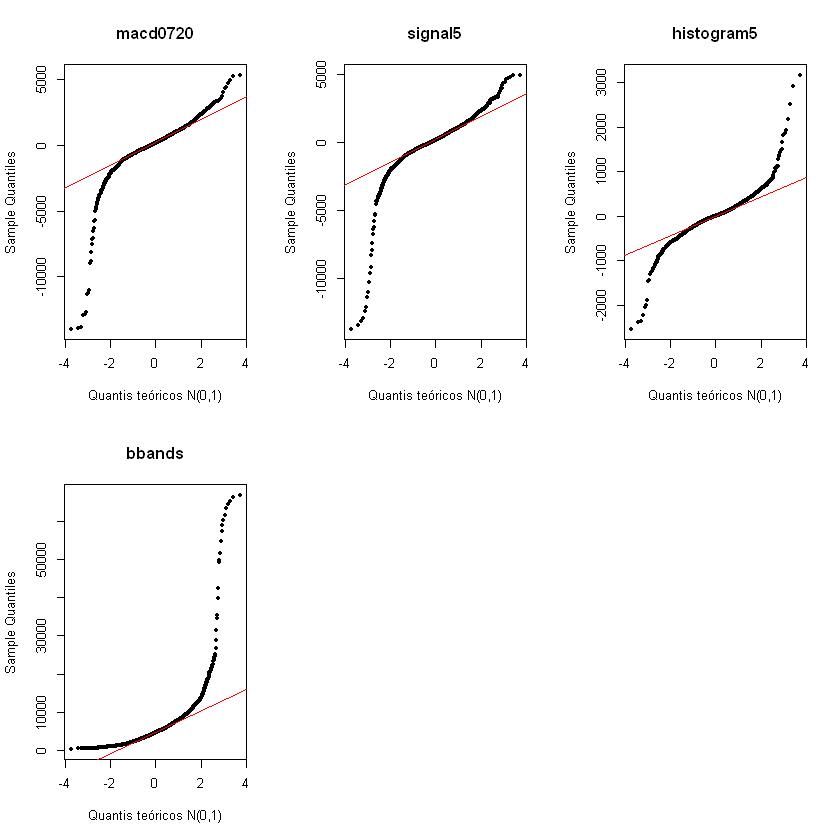

In [44]:
par(mfrow=c(2,3))

qqnorm(bvspout$macd0720, main = "macd0720", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$macd0720, lty = 1, col = "red")

qqnorm(bvspout$signal5, main = "signal5", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$signal5, lty = 1, col = "red")

qqnorm(bvspout$histogram5, main = "histogram5", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$histogram5, lty = 1, col = "red")

qqnorm(bvspout$bbands, main = "bbands", xlab = "Quantis teóricos N(0,1)", pch = 20)
qqline(bvspout$bbands, lty = 1, col = "red")

# Etapa 6: Preprocessamento dos Dados

## 1. Normalização - Método Min-Max

In [45]:
# Função para normalização dos dados
normalize_minmax = function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [46]:
bvspmm <- normalize_minmax(bvspout[,-c(1, 16, 17)])
head(bvspmm)

,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2318566,0.2322653,0.2346402,0.1060831,0.1078040,0.1051392,0.1051068,0.1666350,0.1888925,0.08263564,0.1329358,0.1396464,0.09818250,0.1165366
2,0.2267731,0.2317736,0.2341671,0.1070055,0.1082637,0.1050911,0.1050115,0.1617753,0.1829986,0.08366988,0.1293542,0.1360996,0.09814773,0.1183754
3,0.2252867,0.2312710,0.2336164,0.1078291,0.1087600,0.1050890,0.1050137,0.1572011,0.1774279,0.08466633,0.1261114,0.1327511,0.09825338,0.1203605
4,0.2241609,0.2304493,0.2330612,0.1085470,0.1092739,0.1050835,0.1049079,0.1529314,0.1721769,0.08564764,0.1232314,0.1295407,0.09858392,0.1224161
5,0.2217868,0.2295359,0.2322223,0.1094468,0.1097455,0.1051020,0.1053069,0.1488493,0.1671865,0.08655600,0.1204732,0.1264212,0.09894513,0.1243027
6,0.2241593,0.2285367,0.2315246,0.1094177,0.1098559,0.1051590,0.1050361,0.1453395,0.1624851,0.08774750,0.1185977,0.1235536,0.09993728,0.1247442


In [47]:
data <- bvspout$data
direction <- bvspout$direction
dirret <- bvspout$dirret

bvspmm <- cbind(data, bvspmm, direction, dirret)
head(bvspmm)

,data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2001-02-15,0.2318566,0.2322653,0.2346402,0.1060831,0.1078040,0.1051392,0.1051068,0.1666350,0.1888925,0.08263564,0.1329358,0.1396464,0.09818250,0.1165366,0,nowhere
2,2001-02-16,0.2267731,0.2317736,0.2341671,0.1070055,0.1082637,0.1050911,0.1050115,0.1617753,0.1829986,0.08366988,0.1293542,0.1360996,0.09814773,0.1183754,0,down
3,2001-02-19,0.2252867,0.2312710,0.2336164,0.1078291,0.1087600,0.1050890,0.1050137,0.1572011,0.1774279,0.08466633,0.1261114,0.1327511,0.09825338,0.1203605,0,down
4,2001-02-20,0.2241609,0.2304493,0.2330612,0.1085470,0.1092739,0.1050835,0.1049079,0.1529314,0.1721769,0.08564764,0.1232314,0.1295407,0.09858392,0.1224161,0,down
5,2001-02-21,0.2217868,0.2295359,0.2322223,0.1094468,0.1097455,0.1051020,0.1053069,0.1488493,0.1671865,0.08655600,0.1204732,0.1264212,0.09894513,0.1243027,0,down
6,2001-02-22,0.2241593,0.2285367,0.2315246,0.1094177,0.1098559,0.1051590,0.1050361,0.1453395,0.1624851,0.08774750,0.1185977,0.1235536,0.09993728,0.1247442,0,down


## 2. Normalização - Método Z-Score

In [48]:
# Função para normalização dos dados
normalize_zscore = function(x) {
    return ((x - mean(x)) / sd(x))
}

In [49]:
m <- as.matrix(bvspout[,-c(1, 16, 17)]) 

bvspz <- normalize_zscore(m)

head(bvspz)

close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
0.2171430,0.2194074,0.2325660,-0.4797095,-0.4701748,-0.4849393,-0.4851186,-0.1442197,-0.02090122,-0.6096210,-0.3309313,-0.2937508,-0.5234831,-0.4217917
0.1889781,0.2166832,0.2299444,-0.4745989,-0.4676277,-0.4852055,-0.4856466,-0.1711448,-0.05355655,-0.6038908,-0.3507753,-0.3134021,-0.5236757,-0.4116034
0.1807426,0.2138985,0.2268932,-0.4700358,-0.4648782,-0.4852173,-0.4856346,-0.1964884,-0.08442104,-0.5983699,-0.3687422,-0.3319544,-0.5230903,-0.4006052
0.1745048,0.2093457,0.2238175,-0.4660584,-0.4620309,-0.4852478,-0.4862208,-0.2201448,-0.11351444,-0.5929329,-0.3846985,-0.3497420,-0.5212590,-0.3892161
0.1613510,0.2042850,0.2191694,-0.4610725,-0.4594176,-0.4851452,-0.4840100,-0.2427615,-0.14116391,-0.5879001,-0.3999808,-0.3670256,-0.5192577,-0.3787630
0.1744961,0.1987490,0.2153040,-0.4612338,-0.4588062,-0.4848294,-0.4855106,-0.2622079,-0.16721188,-0.5812986,-0.4103718,-0.3829137,-0.5137606,-0.3763171


In [50]:
data <- bvspout$data
direction <- bvspout$direction
dirret <- bvspout$dirret

bvspz <- data.frame(bvspz)

bvspz <- cbind(data, bvspz, direction, dirret)
head(bvspz)

,data,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands,direction,dirret
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2001-02-15,0.2171430,0.2194074,0.2325660,-0.4797095,-0.4701748,-0.4849393,-0.4851186,-0.1442197,-0.02090122,-0.6096210,-0.3309313,-0.2937508,-0.5234831,-0.4217917,0,nowhere
2,2001-02-16,0.1889781,0.2166832,0.2299444,-0.4745989,-0.4676277,-0.4852055,-0.4856466,-0.1711448,-0.05355655,-0.6038908,-0.3507753,-0.3134021,-0.5236757,-0.4116034,0,down
3,2001-02-19,0.1807426,0.2138985,0.2268932,-0.4700358,-0.4648782,-0.4852173,-0.4856346,-0.1964884,-0.08442104,-0.5983699,-0.3687422,-0.3319544,-0.5230903,-0.4006052,0,down
4,2001-02-20,0.1745048,0.2093457,0.2238175,-0.4660584,-0.4620309,-0.4852478,-0.4862208,-0.2201448,-0.11351444,-0.5929329,-0.3846985,-0.3497420,-0.5212590,-0.3892161,0,down
5,2001-02-21,0.1613510,0.2042850,0.2191694,-0.4610725,-0.4594176,-0.4851452,-0.4840100,-0.2427615,-0.14116391,-0.5879001,-0.3999808,-0.3670256,-0.5192577,-0.3787630,0,down
6,2001-02-22,0.1744961,0.1987490,0.2153040,-0.4612338,-0.4588062,-0.4848294,-0.4855106,-0.2622079,-0.16721188,-0.5812986,-0.4103718,-0.3829137,-0.5137606,-0.3763171,0,down


# Etapa 7: Seleção de atributos

In [51]:
# Biblioteca(s) Necessária(s)
library(caret)

Loading required package: lattice



## 1. Seleção dos atributos com maiores correlações 

In [52]:
# Matriz de correlação
y <- bvspout[,-c(1, 16, 17)]

corrbvsp <- cor(y)

# Seleção dos atributos que são altamente correlacionados (isealmente > 0.75)
highcorrbvsp <- findCorrelation(corrbvsp, cutoff = 0.5)

# Exibição dos índices que possuem correlação elevada 
print(highcorrbvsp)

 [1] 11 12  8  5 14  2  6  3 10  7


* índice 11: macd0720

* índice 12: signal5

* índice 8: macd1226

* índice 5: std20

* índice 14: bbands

* índice 2: avg10

* índice 6: rsi14

* índice 3: avg20

* índice 10: histogram9

* índice 7: rsi5

## 2. Seleção automática de atributos

Método utilizado para seleção automática dos atributos: *Recursive Feature Elimination* (RFE).

In [53]:
# Definição do controle por meio de uma função de seleção random forest
control <- rfeControl(functions=rfFuncs, method="cv", number=10)

In [54]:
z <- bvspout[,-c(1, 17)]

resultibov <- rfe(direction~., z, rfeControl=control)

Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, importance = TRUE, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

In [55]:
# Resultado da seleção
print(resultibov)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables   RMSE Rsquared    MAE  RMSESD RsquaredSD   MAESD Selected
         4 0.2722   0.6986 0.1474 0.01864    0.04098 0.01125         
         8 0.2628   0.7187 0.1414 0.01915    0.04151 0.01202         
        14 0.2523   0.7412 0.1357 0.01857    0.03919 0.01185        *

The top 5 variables (out of 14):
   macd0720, rsi14, signal5, signal9, histogram9



In [56]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(resultibov)

[1] "macd0720"   "rsi14"      "signal5"    "signal9"    "histogram9"
 [6] "macd1226"   "rsi5"       "histogram5" "avg10"      "std10"     
[11] "avg20"      "close"      "bbands"     "std20"

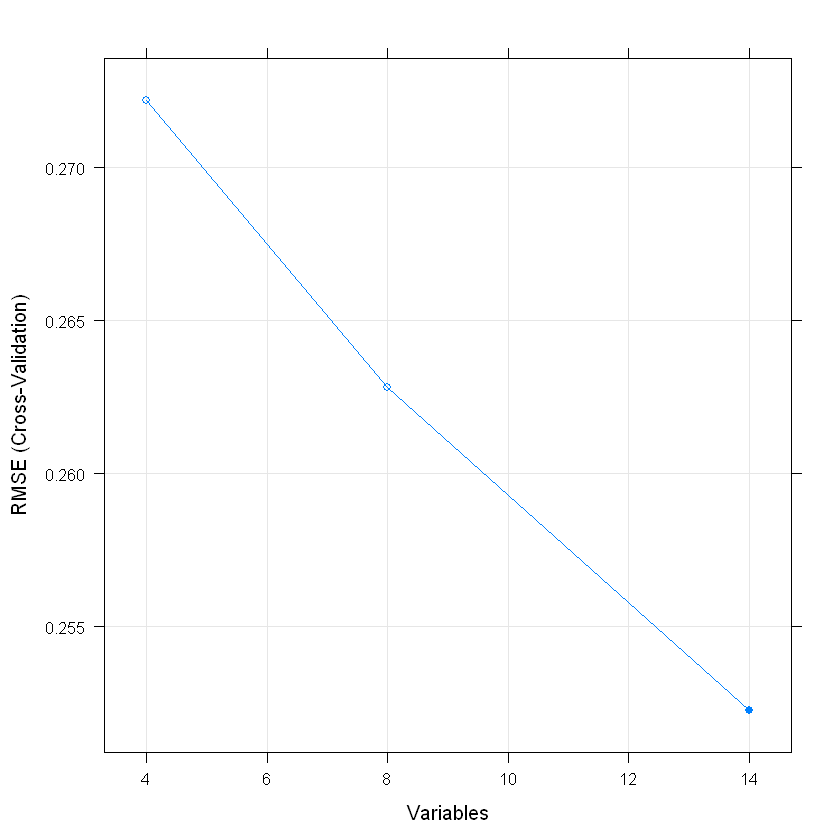

In [57]:
plot(resultibov, type=c("g", "o"))

## 3. Classificação e seleção de atributos com base no algoritmo de random forest

In [58]:
# Biblioteca(s) Necessária(s)
library(Boruta)

In [59]:
# Objeto de armazenamento dos resultados
bvspboruta_output <- Boruta(direction ~., data = z, doTrace = 0)
names(bvspboruta_output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [60]:
# Obtenção das variáveis de significância
bvspboruta_signif <- getSelectedAttributes(bvspboruta_output, withTentative = TRUE)
print(bvspboruta_signif)

 [1] "close"      "avg10"      "avg20"      "std10"      "std20"     
 [6] "rsi14"      "rsi5"       "macd1226"   "signal9"    "histogram9"
[11] "macd0720"   "signal5"    "histogram5" "bbands"    


In [61]:
# Correção preliminar
bvsproughfixmod <- TentativeRoughFix(bvspboruta_output)
bvspboruta_signif2 <- getSelectedAttributes(bvsproughfixmod)
print(bvspboruta_signif2)

Warning message in TentativeRoughFix(bvspboruta_output):
"There are no Tentative attributes! Returning original object."


 [1] "close"      "avg10"      "avg20"      "std10"      "std20"     
 [6] "rsi14"      "rsi5"       "macd1226"   "signal9"    "histogram9"
[11] "macd0720"   "signal5"    "histogram5" "bbands"    


In [62]:
# Score de importância das variáveis
bvspboruta_imp <- attStats(bvsproughfixmod)
bvspboruta_imp2 <- bvspboruta_imp[bvspboruta_imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(bvspboruta_imp2[order(-bvspboruta_imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"


,meanImp,decision
,<dbl>,<fct>
macd0720,49.30009,Confirmed
rsi14,38.35262,Confirmed
signal5,35.35924,Confirmed
macd1226,32.21374,Confirmed
signal9,29.20912,Confirmed
rsi5,26.80129,Confirmed


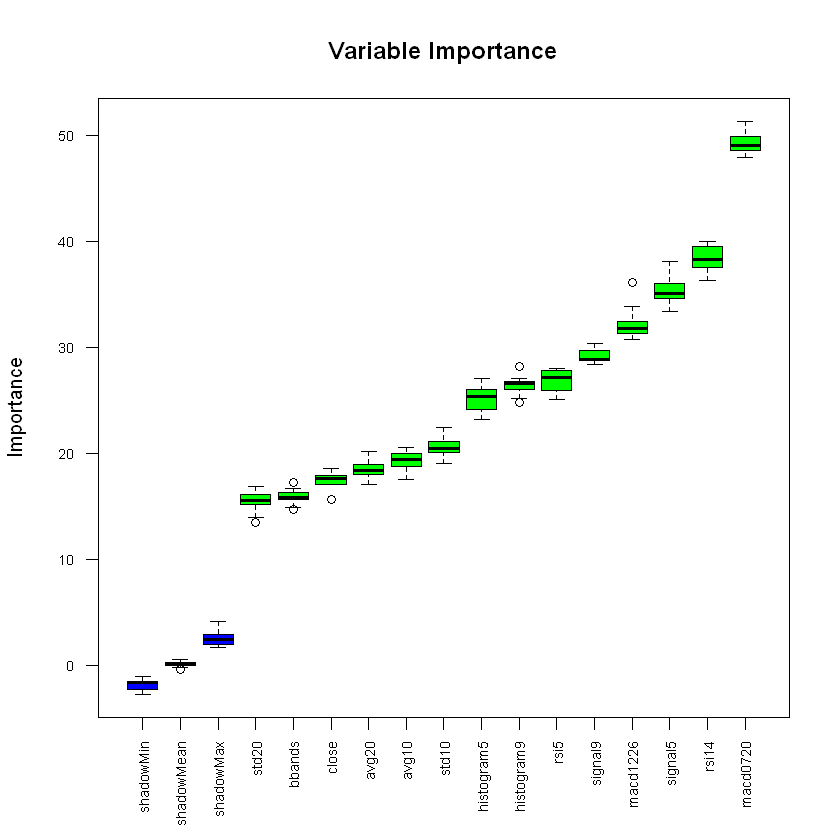

In [63]:
# Análise Gráfica
plot(bvspboruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")  

Colunas em verde são as variáveis "confirmadas" e as barras em azul representam (ShadowMax e ShadowMin => utilizados no algoritmo para decidir se uma variável é importante ou não).

# Etapa 8: Predição

## 1. Separação dos dados de treino e teste

In [64]:
# Biblioteca(s) Necessária(s)
install.packages("keras")
library(keras)

package 'keras' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\davib\AppData\Local\Temp\RtmpYp9owv\downloaded_packages


In [65]:
# Determinação do tamanho da amostra
bvspsplit <- sample(2, nrow(bvspz), replace=TRUE, prob=c(0.70, 0.30))

# 0.70 de probabilidade dos dados como de treino e com 0.30 de probabilidade dos dados como de teste

In [66]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
bvsptrain <- bvspz[bvspsplit == 1,]
bvsptest <- bvspz[bvspsplit == 2,]

In [67]:
dim(bvspz)
dim(bvsptrain)
dim(bvsptest)

[1] 4950   17

[1] 3481   17

[1] 1469   17

## 2. Regressão Logística

In [68]:
# Criação de uma fórmula que tem "Direction" como variável dependente e todas as demais como variáveis independentes
formula <- paste("direction ~.", sep = "")

### 2.1. Análise para dados de treino

**Construção do modelo**

In [69]:
# Utilização de um modelo linear generalizado para ajustar o modelo
bvspmodel <- glm(formula, bvsptrain[,-c(1,17)], family = binomial)

# c(1,17) => contém as colunas "data" e "dirret"

summary(bvspmodel) 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = formula, family = binomial, data = bvsptrain[, 
    -c(1, 17)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8748  -0.1658   0.0043   0.1970   4.5241  

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  160.5629  1058.9716   0.152   0.8795    
close          2.9798     0.7624   3.908 9.29e-05 ***
avg10         -6.3296     9.0157  -0.702   0.4826    
avg20          3.5430     8.9936   0.394   0.6936    
std10        -15.4174     7.8124  -1.973   0.0484 *  
std20          6.7567     7.5654   0.893   0.3718    
rsi14        426.2553   244.7503   1.742   0.0816 .  
rsi5         199.9544   110.0175   1.817   0.0691 .  
macd1226    -734.3502  1918.8102  -0.383   0.7019    
signal9       92.1735  1917.9598   0.048   0.9617    
histogram9  -634.8573  1918.5708  -0.331   0.7407    
macd0720     704.9069  1006.7662   0.700   0.4838    
signal5      116.6912  1005.0505   0.116   

In [70]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
bvsppred <- predict(bvspmodel, bvsptrain[,-c(1,17)])

# c(1,17) => contém as colunas "data" e "dirret"

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


**Conversão dos valores ajustados em probabilidade**

In [71]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
bvspprob <- 1 / (1+exp(-(bvsppred)))

head(bvspprob)   

2            5            6            7            8            9 
2.677790e-04 9.268768e-07 4.833897e-07 6.555717e-07 2.994938e-07 5.507371e-07

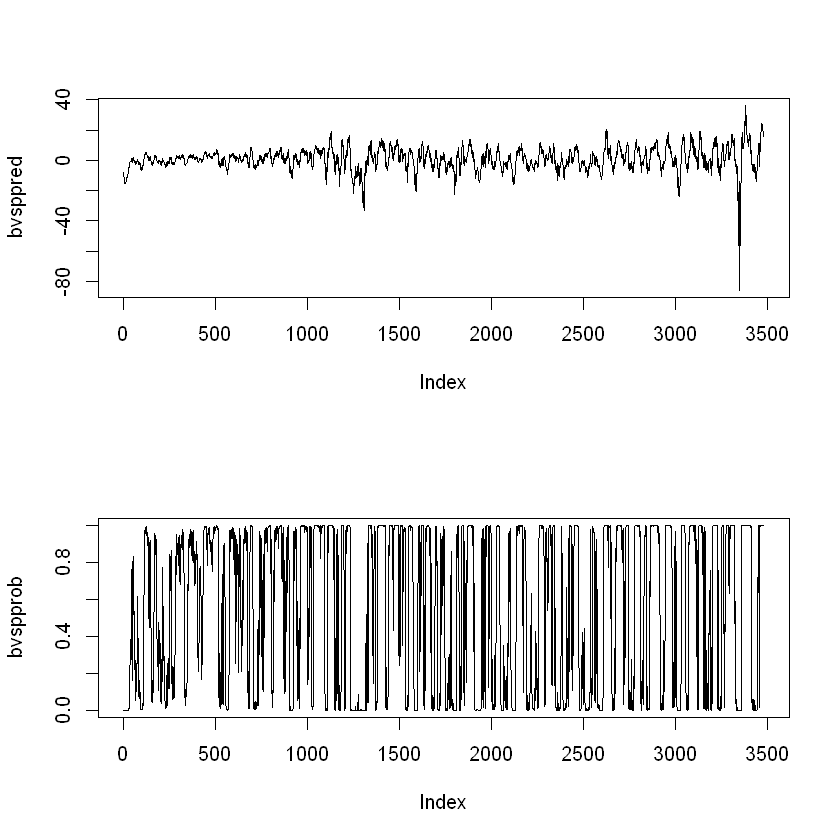

In [72]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(bvsppred, type = "l")           

# Figura 2: probabilidade do modelo
plot(bvspprob, type = "l")

**Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")**

In [73]:
bvsppred_directionin <- NULL

# Direção para cima (Up)
bvsppred_directionin[bvspprob > 0.5] <- 1    

# Direção para baixo (Down)
bvsppred_directionin[bvspprob <= 0.5] <- 0

**Verificação da acurácia do modelo**

In [74]:
# Biblioteca(s) Necessária(s)
library(caret)
library(e1071)


Attaching package: 'e1071'


The following objects are masked from 'package:moments':

    kurtosis, moment, skewness




In [75]:
# Matriz de Confusão de treino
confusionMatrix(table(bvsppred_directionin, bvsptrain$direction))

Confusion Matrix and Statistics

                    
bvsppred_directionin    0    1
                   0 1388  137
                   1  134 1822
                                          
               Accuracy : 0.9221          
                 95% CI : (0.9127, 0.9308)
    No Information Rate : 0.5628          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8418          
                                          
 Mcnemar's Test P-Value : 0.9033          
                                          
            Sensitivity : 0.9120          
            Specificity : 0.9301          
         Pos Pred Value : 0.9102          
         Neg Pred Value : 0.9315          
             Prevalence : 0.4372          
         Detection Rate : 0.3987          
   Detection Prevalence : 0.4381          
      Balanced Accuracy : 0.9210          
                                          
       'Positive' Class : 0         

**Curva ROC 1**

In [76]:
# Biblioteca(s) Necessária(s)
library(PRROC)

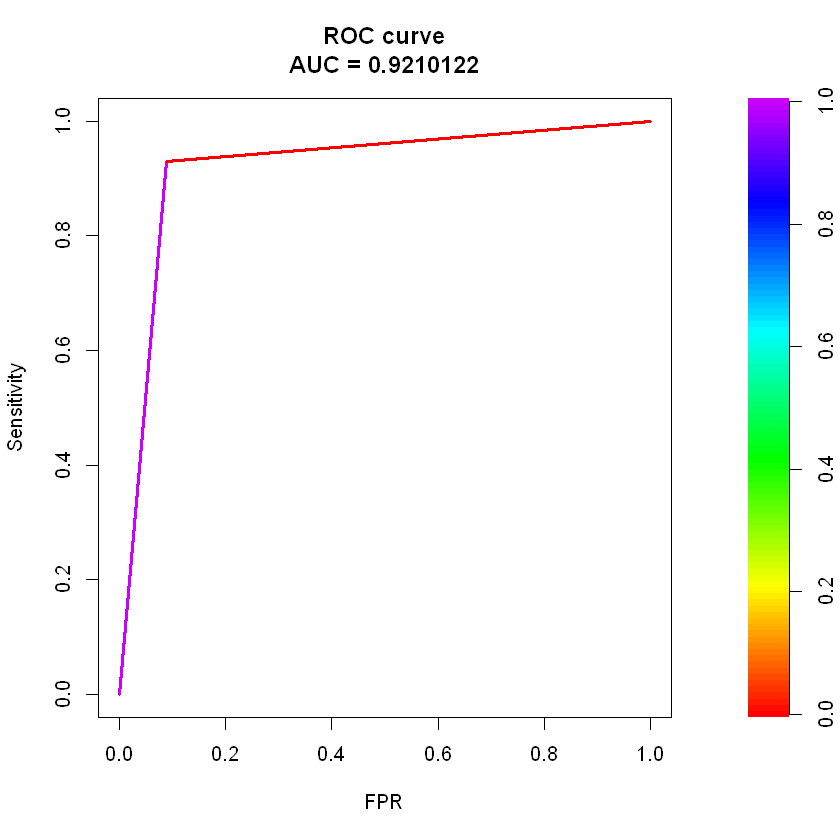

In [77]:
plot(roc.curve(scores.class0 = bvsppred_directionin, weights.class0=bvsptrain$direction, curve=TRUE))

**Curva ROC 2**

In [78]:
# Biblioteca(s) Necessária(s)
library(precrec)

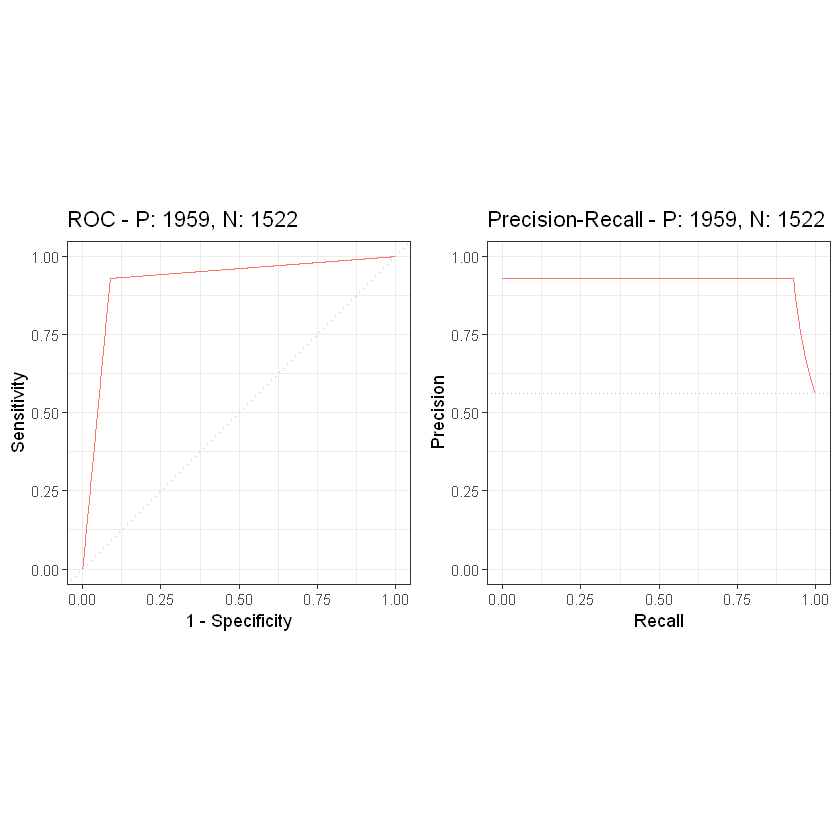

In [79]:
bvspprecrecin <- evalmod(scores = bvsppred_directionin, labels = bvsptrain$direction)
autoplot(bvspprecrecin)

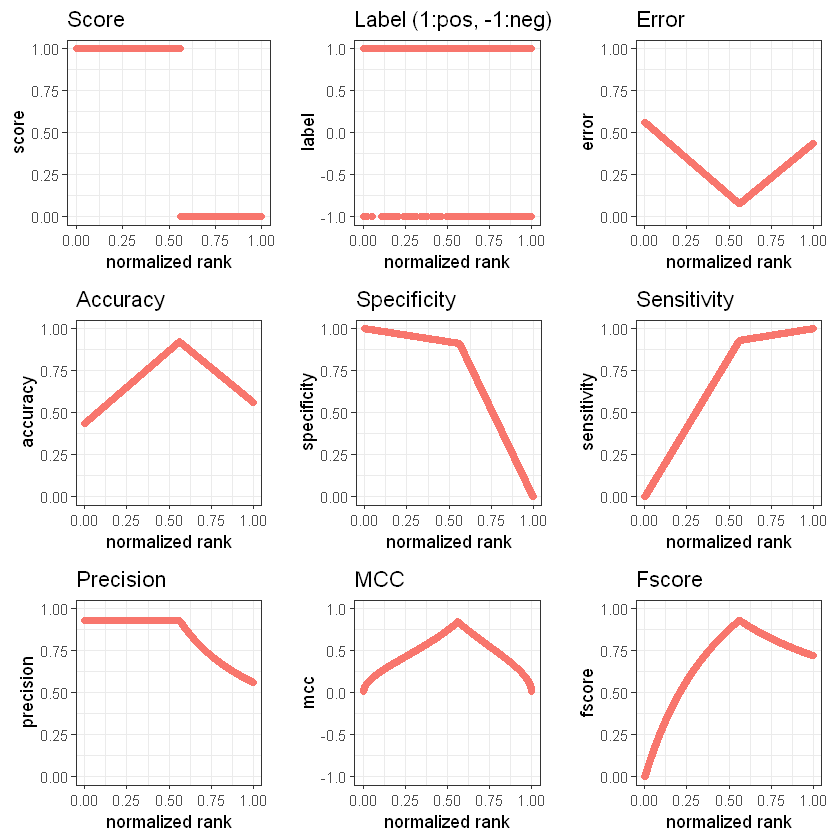

In [80]:
bvspprecrecin2 <- evalmod(scores = bvsppred_directionin, labels = bvsptrain$direction, mode="basic")
autoplot(bvspprecrecin2)

### 2.2. Análise para dados de teste

In [81]:
# Ajustamento do modelo
bvsppredout <- predict(bvspmodel, bvsptest[,-c(1,17)])

# c(1,17) => contém as colunas "data" e "dirret"

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


In [82]:
# Conversão do output em uma forma probabilistica
bvspprobout <- 1 / (1+exp(-(bvsppredout)))

head(bvspprobout)  

1            3            4           10           11           13 
9.204040e-03 2.110383e-05 3.017213e-06 6.348429e-07 5.319380e-07 3.511234e-07

In [83]:
# Classificação das probabilidades
bvsppred_directionout <- NULL

# Direção para cima (Up)
bvsppred_directionout[bvspprobout > 0.5] <- 1    

# Direção para baixo (Down)
bvsppred_directionout[bvspprobout <= 0.5] <- 0

In [84]:
# Matriz de Confusão de teste
confusionMatrix(table(bvsppred_directionout, bvsptest$direction))

Confusion Matrix and Statistics

                     
bvsppred_directionout   0   1
                    0 571  72
                    1  62 764
                                         
               Accuracy : 0.9088         
                 95% CI : (0.8929, 0.923)
    No Information Rate : 0.5691         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8144         
                                         
 Mcnemar's Test P-Value : 0.4369         
                                         
            Sensitivity : 0.9021         
            Specificity : 0.9139         
         Pos Pred Value : 0.8880         
         Neg Pred Value : 0.9249         
             Prevalence : 0.4309         
         Detection Rate : 0.3887         
   Detection Prevalence : 0.4377         
      Balanced Accuracy : 0.9080         
                                         
       'Positive' Class : 0              
               

**Curva ROC 1**

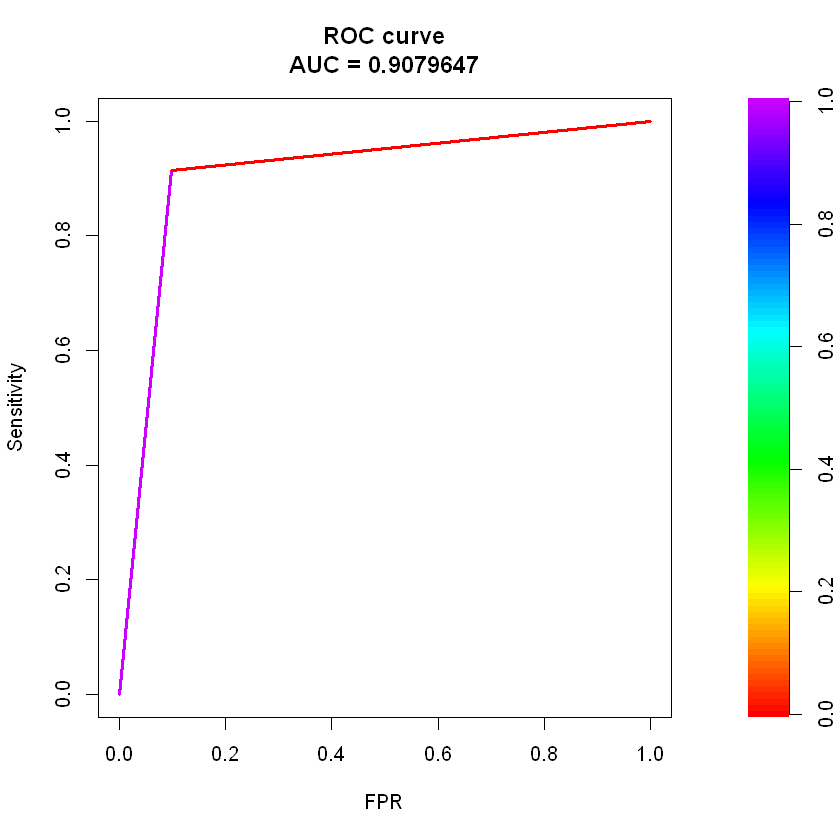

In [85]:
plot(roc.curve(scores.class0 = bvsppred_directionout, weights.class0=bvsptest$direction, curve=TRUE))

**Curva ROC 2**

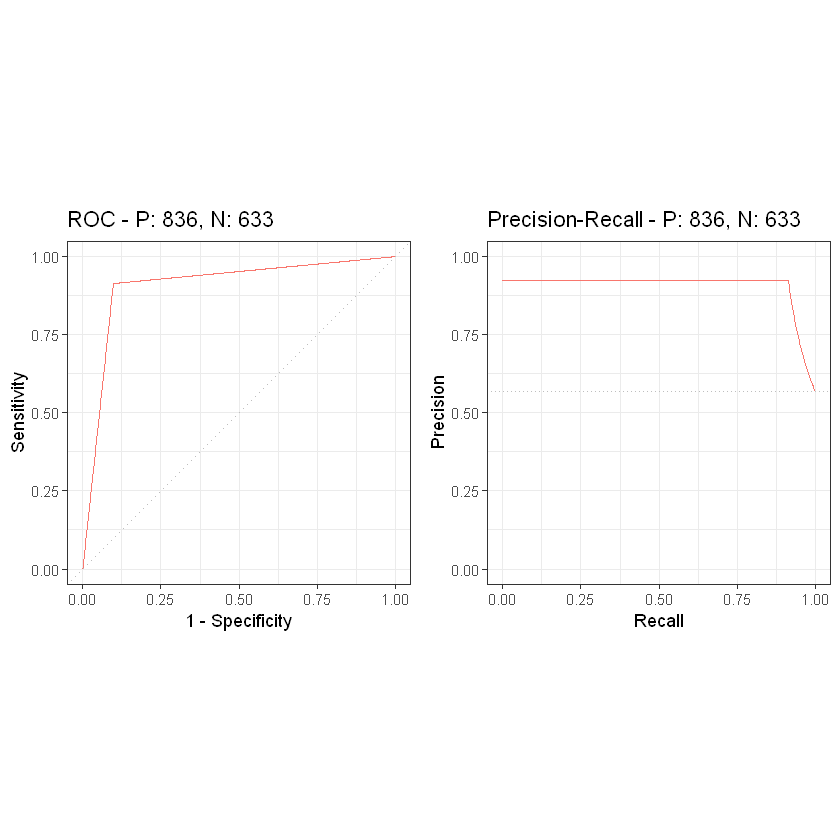

In [86]:
bvspprecrecout <- evalmod(scores = bvsppred_directionout, labels = bvsptest$direction)
autoplot(bvspprecrecout)

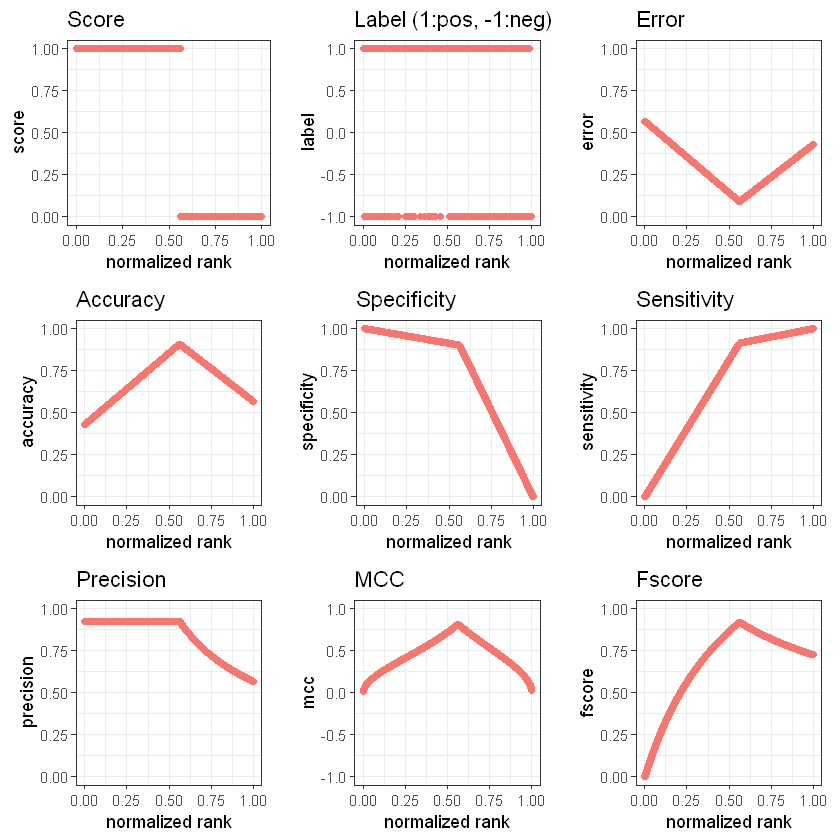

In [87]:
bvspprecrecout <- evalmod(scores = bvsppred_directionout, labels = bvsptest$direction, mode="basic")
autoplot(bvspprecrecout)

## 3. Algoritmo K-means

In [88]:
# Definição do número de clusters
cluster <- 2
set.seed(1)

# O número de clusters corresponde ao número de direções (up = 1, down = 0)

**Remoção das colunas de rótulo**

K-means é um algoritmo do tipo não supervisionado (não trabalha com dados rotulados) e os atributos "direction" e "dirret" funcionam como rótulos.

Rótulos não são desejáveis para algorítmos não supervisionados.

In [89]:
bvsptrain2 <- bvsptrain[,-c(16,17)]
bvsptest2 <- bvsptest[,-c(16,17)]

# c(16,17) => contém as colunas "direction" e "dirret"

**Execução do algoritmo**

In [90]:
bvspmodel2 <- kmeans(bvsptrain2[,-1], cluster)   # retirada da coluna "data"

head(bvspmodel2$cluster)

2 5 6 7 8 9 
2 2 2 2 2 2

In [91]:
# Extração do centróides finais dos cluesters (Centros finais do cluster)
bvspmodel2$center

,close,avg10,avg20,std10,std20,rsi14,rsi5,macd1226,signal9,histogram9,macd0720,signal5,histogram5,bbands
1,2.2778967,2.2740568,2.2684527,-0.4376900,-0.4191674,-0.4841036,-0.4840679,-0.4784160,-0.4781640,-0.4863557,-0.4790558,-0.4785633,-0.4864834,-0.2177620
2,0.5049324,0.5019938,0.4999196,-0.4625055,-0.4536808,-0.4840866,-0.4840076,-0.4818245,-0.4815059,-0.4866211,-0.4829595,-0.4831020,-0.4861601,-0.3558157


In [92]:
# Extração do número de pontos de dados de cada cluster    
bvspmodel2$size

[1] 2315 1166

**Verificação da acurácia do modelo**

In [93]:
# Cálculo da soma dos quadrados entre clusters
round(bvspmodel2$tot.withinss, digits = 2)

[1] 4424.36

In [94]:
# Cálculo da soma total dos quadrados
round(bvspmodel2$totss, digits = 2)

[1] 11738.45

In [95]:
# Acurácia = Soma dos quadrados entre os Clusters / Soma Total dos quadrados 
round(bvspmodel2$tot.withinss/bvspmodel2$totss, digits = 2)

[1] 0.38

A acurácia do modelo não é satisfatória.

**Previsão**

In [96]:
# Biblioteca(s) Necessária(s)
library(clue)

In [97]:
bvsppredkm <- cl_predict(bvspmodel2, bvsptest2[,-1])   # retirada da coluna "data"
head(bvsppredkm)

[1] 2 2 2 2 2 2

# 4. Árvore de decisão

In [98]:
# Biblioteca(s) Necessária(s)
library(rpart) 
library(rpart.plot)

In [99]:
# Criação da árvore de decisão
bvspmodel3 <- rpart(formula, bvsptrain[,-1], method = "class")   # retirada da coluna "data"

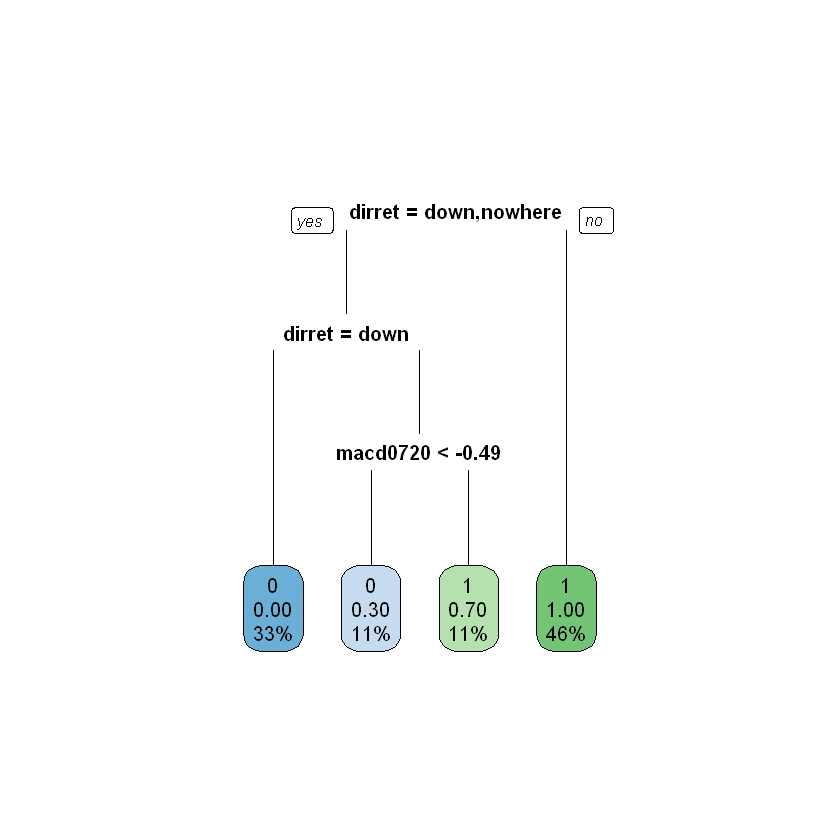

In [100]:
# Criação da árvore gráfica
rpart.plot(bvspmodel3, type = 0, extra = 106, tweak = 1) 

In [101]:
# Importância dos atributos
bvspimp <- varImp(bvspmodel3, scale = F)
bvspimp

,Overall
,<dbl>
dirret,1339.11259
macd0720,1329.99117
macd1226,1028.99761
rsi14,909.63043
signal5,1113.51181
signal9,16.23536
close,0.00000
avg10,0.00000
avg20,0.00000


### 4.1. Análise para dados de treino

In [102]:
# Previsão
bvsppred <- predict(bvspmodel3, bvsptrain[,-1], type = "class")   # retirada da coluna "data"

In [103]:
# Matriz de Confusão de treino
confusionMatrix(table(bvsppred, bvsptrain$direction)) 

Confusion Matrix and Statistics

        
bvsppred    0    1
       0 1411  115
       1  111 1844
                                         
               Accuracy : 0.9351         
                 95% CI : (0.9264, 0.943)
    No Information Rate : 0.5628         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8681         
                                         
 Mcnemar's Test P-Value : 0.8418         
                                         
            Sensitivity : 0.9271         
            Specificity : 0.9413         
         Pos Pred Value : 0.9246         
         Neg Pred Value : 0.9432         
             Prevalence : 0.4372         
         Detection Rate : 0.4053         
   Detection Prevalence : 0.4384         
      Balanced Accuracy : 0.9342         
                                         
       'Positive' Class : 0              
                                         

### 4.2. Análise para dados de teste

In [104]:
# Previsão
bvsppred <- predict(bvspmodel3, bvsptest[,-1], type = "class")   # retirada da coluna "data"

In [105]:
# Matriz de Confusão de teste
confusionMatrix(table(bvsppred, bvsptest$direction)) 

Confusion Matrix and Statistics

        
bvsppred   0   1
       0 580  56
       1  53 780
                                          
               Accuracy : 0.9258          
                 95% CI : (0.9112, 0.9387)
    No Information Rate : 0.5691          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8488          
                                          
 Mcnemar's Test P-Value : 0.8481          
                                          
            Sensitivity : 0.9163          
            Specificity : 0.9330          
         Pos Pred Value : 0.9119          
         Neg Pred Value : 0.9364          
             Prevalence : 0.4309          
         Detection Rate : 0.3948          
   Detection Prevalence : 0.4329          
      Balanced Accuracy : 0.9246          
                                          
       'Positive' Class : 0               
                                          

## 5. K Nearest Neighborhood

In [106]:
# Biblioteca(s) Necessária(s)
library(class)

In [107]:
# Definição do número de Neighborhoods    
neighborhood <- 3

# O número de neighborhoods corresponde ao número de direções (Up, Down, NoWhere)

set.seed(1)

isdir <- bvsptrain$dirret

### 5.1. Análise para dados de treino

In [108]:
# modelo avaliado por treino
bvspmodel4_train <- knn(bvsptrain2[,-1], bvsptrain2[,-1], isdir, neighborhood)   # retirada da coluna "data"
head(bvspmodel4_train)


[1] down down down down down down
Levels: down nowhere up

In [109]:
# Matriz de Confusão de treino
confusionMatrix(table(bvspmodel4_train, bvsptrain$dirret)) 

Confusion Matrix and Statistics

                
bvspmodel4_train down nowhere   up
         down    1060      66   11
         nowhere   77     623   59
         up         7      59 1519

Overall Statistics
                                          
               Accuracy : 0.9199          
                 95% CI : (0.9103, 0.9287)
    No Information Rate : 0.4565          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8744          
                                          
 Mcnemar's Test P-Value : 0.6292          

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.9266         0.8329    0.9559
Specificity               0.9671         0.9502    0.9651
Pos Pred Value            0.9323         0.8208    0.9584
Neg Pred Value            0.9642         0.9541    0.9631
Prevalence                0.3286         0.2149    0.4565
Detection Rate            0.3045

### 5.2. Análise para dados de teste

In [110]:
bvspmodel4_test <- knn(bvsptrain2[,-1], bvsptest2[,-1], isdir, neighborhood)   # retirada da coluna "data"
head(bvspmodel4_test)

[1] down down down down down down
Levels: down nowhere up

In [111]:
summary(bvspmodel4_test)

down nowhere      up 
    461     337     671

In [112]:
# Matriz de Confusão de teste
confusionMatrix(table(bvspmodel4_test, bvsptest$dirret)) 

Confusion Matrix and Statistics

               
bvspmodel4_test down nowhere  up
        down     390      65   6
        nowhere   64     206  67
        up         9      65 597

Overall Statistics
                                          
               Accuracy : 0.8121          
                 95% CI : (0.7912, 0.8318)
    No Information Rate : 0.4561          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7066          
                                          
 Mcnemar's Test P-Value : 0.8877          

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.8423         0.6131    0.8910
Specificity               0.9294         0.8844    0.9074
Pos Pred Value            0.8460         0.6113    0.8897
Neg Pred Value            0.9276         0.8852    0.9085
Prevalence                0.3152         0.2287    0.4561
Detection Rate            0.2655         

## 6. Support Vector Machine

In [113]:
bvspmodel5 <- svm(bvsptrain2[,-1], as.factor(isdir))    # retirada da coluna "data"
head(bvspmodel5)

$call
svm.default(x = bvsptrain2[, -1], y = as.factor(isdir))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.07142857


### 6.1. Análise para dados de treino

In [114]:
bvsppredsvm <- predict(bvspmodel5, bvsptrain2[,-1]) 
# Matriz de Confusão do treinamento
confusionMatrix(table(bvsppredsvm, bvsptrain$dirret))

Confusion Matrix and Statistics

           
bvsppredsvm down nowhere   up
    down     985     149   23
    nowhere  134     432  106
    up        25     167 1460

Overall Statistics
                                          
               Accuracy : 0.8265          
                 95% CI : (0.8135, 0.8389)
    No Information Rate : 0.4565          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7257          
                                          
 Mcnemar's Test P-Value : 0.002289        

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.8610         0.5775    0.9188
Specificity               0.9264         0.9122    0.8985
Pos Pred Value            0.8513         0.6429    0.8838
Neg Pred Value            0.9316         0.8875    0.9295
Prevalence                0.3286         0.2149    0.4565
Detection Rate            0.2830         0.1241    0.4194

### 6.2. Análise para dados de teste

In [115]:
bvsppredsvm <- predict(bvspmodel5, bvsptest2[,-1])    # retirada da coluna "data"
head(bvsppredsvm)

1    3    4   10   11   13 
down down down down down down 
Levels: down nowhere up

In [116]:
# Matriz de Confusão de teste
confusionMatrix(table(bvsppredsvm, bvsptest$dirret)) 

Confusion Matrix and Statistics

           
bvsppredsvm down nowhere  up
    down     400      89  11
    nowhere   54     158  49
    up         9      89 610

Overall Statistics
                                          
               Accuracy : 0.7951          
                 95% CI : (0.7735, 0.8155)
    No Information Rate : 0.4561          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6759          
                                          
 Mcnemar's Test P-Value : 0.0001429       

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.8639         0.4702    0.9104
Specificity               0.9006         0.9091    0.8773
Pos Pred Value            0.8000         0.6054    0.8616
Neg Pred Value            0.9350         0.8526    0.9212
Prevalence                0.3152         0.2287    0.4561
Detection Rate            0.2723         0.1076    0.4152
Det

## 7. Regressão Linear

In [117]:
# Construção do modelo
bvsplm.fit = lm(close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + signal9 +
                  histogram9 + macd0720 + signal5 + histogram5 + bbands, data = bvspz)

summary(bvsplm.fit)


Call:
lm(formula = close ~ avg10 + avg20 + std10 + std20 + rsi14 + 
    rsi5 + macd1226 + signal9 + histogram9 + macd0720 + signal5 + 
    histogram5 + bbands, data = bvspz)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.70361 -0.00780 -0.00120  0.00749  2.64366 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.324521   0.928119   3.582 0.000344 ***
avg10        0.803375   0.059407  13.523  < 2e-16 ***
avg20        0.195688   0.059439   3.292 0.001001 ** 
std10       -0.070854   0.049536  -1.430 0.152674    
std20        0.009073   0.035775   0.254 0.799796    
rsi14        2.082993   2.170160   0.960 0.337186    
rsi5         0.400012   1.247791   0.321 0.748545    
macd1226    -0.579989   0.265656  -2.183 0.029066 *  
signal9      0.235159   0.105762   2.223 0.026228 *  
histogram9  -0.098285   0.227591  -0.432 0.665869    
macd0720     0.857371   0.242274   3.539 0.000406 ***
signal5      0.31

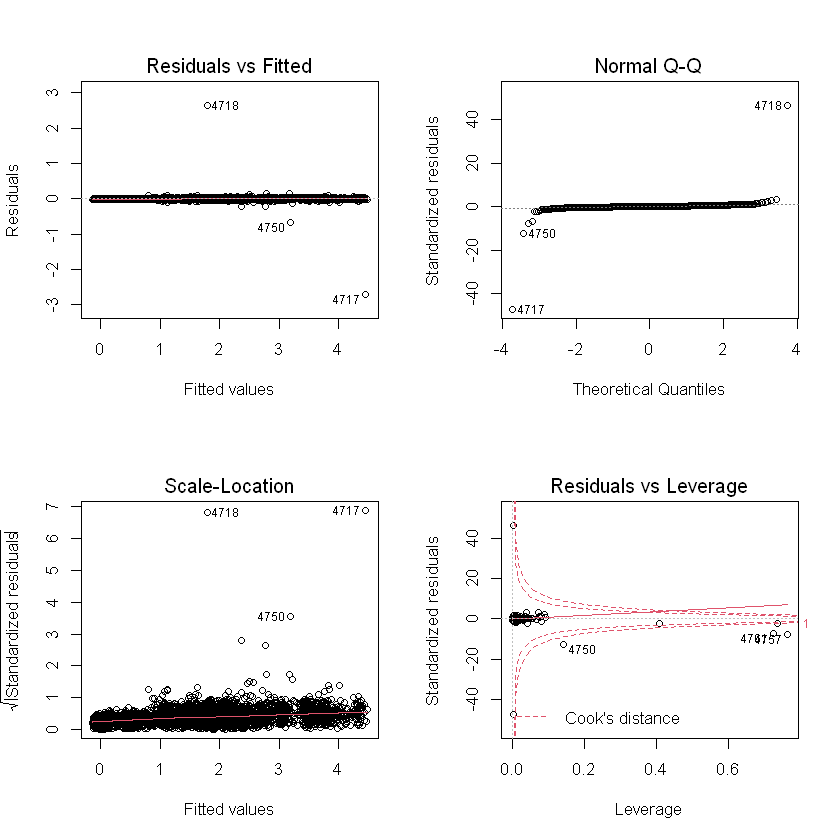

In [118]:
# Análise Gráfica
par(mfrow=c(2,2))
plot(bvsplm.fit)

In [119]:
# Previsão
bvsprlm <- predict(bvsplm.fit, bvsptest[,-c(1,16,17)])

Warning message in predict.lm(bvsplm.fit, bvsptest[, -c(1, 16, 17)]):
"prediction from a rank-deficient fit may be misleading"


In [120]:
# Significância do modelo
anova(bvsplm.fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
avg10,1,5.454000e+03,5.454000e+03,1.673409e+06,0.000000e+00
avg20,1,4.099299e+00,4.099299e+00,1.257757e+03,1.267455e-245
std10,1,6.563402e-02,6.563402e-02,2.013799e+01,7.368939e-06
std20,1,1.012818e-01,1.012818e-01,3.107553e+01,2.613739e-08
rsi14,1,3.297501e+00,3.297501e+00,1.011747e+03,3.835671e-202
rsi5,1,4.225848e+00,4.225848e+00,1.296585e+03,2.506850e-252
macd1226,1,7.243177e-02,7.243177e-02,2.222369e+01,2.493387e-06
signal9,1,2.144022e+00,2.144022e+00,6.578339e+02,2.632683e-136
histogram9,1,2.475007e+00,2.475007e+00,7.593873e+02,1.283859e-155


In [121]:
# Cálculo da importância das variáveis no modelo
round(varImp(bvsplm.fit, scale = TRUE), digits = 2)

,Overall
,<dbl>
avg10,13.52
avg20,3.29
std10,1.43
std20,0.25
rsi14,0.96
rsi5,0.32
macd1226,2.18
signal9,2.22
histogram9,0.43


**Métricas de Avaliação**

In [122]:
# Biblioteca(s) Necessária(s)
library(Metrics)


Attaching package: 'Metrics'


The following object is masked from 'package:precrec':

    auc


The following objects are masked from 'package:caret':

    precision, recall




In [123]:
# Root Mean Squared Error
round(rmse(bvsptest$close, bvsprlm), digits = 2)

[1] 0.02

In [124]:
# Mean Absolute Error
round(mae(bvsptest$close, bvsprlm), digits = 2)

[1] 0.01

In [125]:
# Mean Squared Error
round(mse(bvsptest$close, bvsprlm), digits = 2)

[1] 0

In [126]:
# Mean Absolute Percent Error
round(mape(bvsptest$close, bvsprlm), digits = 2)

[1] 0.03

In [127]:
# Resumo das métricas de avaliação
round(postResample(pred = bvsprlm, obs = bvsptest$close), digits = 2)

RMSE Rsquared      MAE 
    0.02     1.00     0.01

**Seleção de modelo mais simples, mas com representatividade semelhante**

In [128]:
# Método Stepwise
step(bvsplm.fit, direction = "both")

Start:  AIC=-28332.05
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5 + 
    bbands


Step:  AIC=-28332.05
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5

             Df Sum of Sq    RSS    AIC
- std20       1   0.00021 16.091 -28334
- rsi5        1   0.00033 16.091 -28334
- histogram9  1   0.00061 16.091 -28334
- rsi14       1   0.00300 16.094 -28333
<none>                    16.091 -28332
- std10       1   0.00667 16.097 -28332
- macd1226    1   0.01554 16.106 -28329
- signal9     1   0.01611 16.107 -28329
- avg20       1   0.03533 16.126 -28323
- macd0720    1   0.04082 16.132 -28322
- signal5     1   0.04731 16.138 -28320
- avg10       1   0.59605 16.687 -28154
- histogram5  1   1.76469 17.855 -27819

Step:  AIC=-28333.98
close ~ avg10 + avg20 + std10 + rsi14 + rsi5 + macd1226 + signal9 + 
    histogram9 + macd0720 + signal5 +


Call:
lm(formula = close ~ avg10 + avg20 + macd1226 + signal9 + macd0720 + 
    signal5 + histogram5, data = bvspz)

Coefficients:
(Intercept)        avg10        avg20     macd1226      signal9     macd0720  
     2.2251       0.8218       0.1764      -0.5338       0.2553       0.8061  
    signal5   histogram5  
     0.3172       3.7247  


In [129]:
# Método backward
step(bvsplm.fit, direction = "backward")

Start:  AIC=-28332.05
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5 + 
    bbands


Step:  AIC=-28332.05
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5

             Df Sum of Sq    RSS    AIC
- std20       1   0.00021 16.091 -28334
- rsi5        1   0.00033 16.091 -28334
- histogram9  1   0.00061 16.091 -28334
- rsi14       1   0.00300 16.094 -28333
<none>                    16.091 -28332
- std10       1   0.00667 16.097 -28332
- macd1226    1   0.01554 16.106 -28329
- signal9     1   0.01611 16.107 -28329
- avg20       1   0.03533 16.126 -28323
- macd0720    1   0.04082 16.132 -28322
- signal5     1   0.04731 16.138 -28320
- avg10       1   0.59605 16.687 -28154
- histogram5  1   1.76469 17.855 -27819

Step:  AIC=-28333.98
close ~ avg10 + avg20 + std10 + rsi14 + rsi5 + macd1226 + signal9 + 
    histogram9 + macd0720 + signal5 +


Call:
lm(formula = close ~ avg10 + avg20 + macd1226 + signal9 + macd0720 + 
    signal5 + histogram5, data = bvspz)

Coefficients:
(Intercept)        avg10        avg20     macd1226      signal9     macd0720  
     2.2251       0.8218       0.1764      -0.5338       0.2553       0.8061  
    signal5   histogram5  
     0.3172       3.7247  


In [130]:
# Método Forward
step(bvsplm.fit, direction = "forward")

Start:  AIC=-28332.05
close ~ avg10 + avg20 + std10 + std20 + rsi14 + rsi5 + macd1226 + 
    signal9 + histogram9 + macd0720 + signal5 + histogram5 + 
    bbands




Call:
lm(formula = close ~ avg10 + avg20 + std10 + std20 + rsi14 + 
    rsi5 + macd1226 + signal9 + histogram9 + macd0720 + signal5 + 
    histogram5 + bbands, data = bvspz)

Coefficients:
(Intercept)        avg10        avg20        std10        std20        rsi14  
   3.324521     0.803375     0.195688    -0.070854     0.009073     2.082993  
       rsi5     macd1226      signal9   histogram9     macd0720      signal5  
   0.400012    -0.579989     0.235159    -0.098285     0.857371     0.317636  
 histogram5       bbands  
   3.686314           NA  
